# Eng vs Ind Test Series 2025

# Wagon Wheels and Spike Graphs Standardization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from io import BytesIO

In [2]:
# df = pd.read_csv('day1-comm.csv')
# df = pd.read_csv('day2-comm.csv')
# df = pd.read_csv('test3-comm.csv')
df = pd.read_csv('ENGvIND_Test_Series.csv')
df.head()

,TestNum,inningNumber,oversUnique,oversActual,overNumber,teamRuns,batsmanRuns,isFour,isSix,isWicket,...,pitchLength,shotType,shotControl,totalInningRuns,totalInningWickets,title,Batter,batTeamID,Bowler,bowlTeamID
0,3,1,112.04,112.3,113,0,0,False,False,True,...,YORKER,FLICK,2.0,387,10,Siraj to Carse,Brydon Carse,1,Mohammed Siraj,6
1,3,1,112.03,112.2,113,0,0,False,False,False,...,SHORT_OF_A_GOOD_LENGTH,PULL,2.0,387,9,Siraj to Carse,Brydon Carse,1,Mohammed Siraj,6
2,3,1,112.02,112.2,113,5,0,False,False,False,...,SHORT,LEFT_ALONE,1.0,387,9,Siraj to Carse,Brydon Carse,1,Mohammed Siraj,6
3,3,1,112.01,112.1,113,0,0,False,False,False,...,GOOD_LENGTH,SLOG_SHOT,2.0,382,9,Siraj to Carse,Brydon Carse,1,Mohammed Siraj,6
4,3,1,110.06,110.6,111,0,0,False,False,False,...,YORKER,LEFT_ALONE,1.0,382,9,Siraj to Carse,Brydon Carse,1,Mohammed Siraj,6


In [3]:
df.columns

Index(['TestNum', 'inningNumber', 'oversUnique', 'oversActual', 'overNumber',
       'teamRuns', 'batsmanRuns', 'isFour', 'isSix', 'isWicket',
       'dismissalType', 'byes', 'legbyes', 'wides', 'noballs', 'penalties',
       'wagonX', 'wagonY', 'wagonZone', 'pitchLine', 'pitchLength', 'shotType',
       'shotControl', 'totalInningRuns', 'totalInningWickets', 'title',
       'Batter', 'batTeamID', 'Bowler', 'bowlTeamID'],
      dtype='object')

In [ ]:
# # now we have to apply -1 to shotControl column means
# df['shotControl'] = df['shotControl'] - 1
df['shotControl']

0       1.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
2223    0.0
2224    0.0
2225    1.0
2226    1.0
2227    0.0
Name: shotControl, Length: 2228, dtype: float64

In [8]:
df.columns

Index(['inningNumber', 'oversUnique', 'oversActual', 'overNumber', 'teamRuns',
       'batsmanRuns', 'isFour', 'isSix', 'isWicket', 'dismissalType', 'byes',
       'legbyes', 'wides', 'noballs', 'penalties', 'wagonX', 'wagonY',
       'wagonZone', 'pitchLine', 'pitchLength', 'shotType', 'shotControl',
       'totalInningRuns', 'totalInningWickets', 'title', 'batsmanName',
       'bowlerName'],
      dtype='object')

In [ ]:
# # df['team_bat'] = df[]
# # create a new column as team_bat and team_bowl and 
# # if inningNumber is 1 then team_bat is ENG, and team_bowl is IND, 
# # if inningNumber is 2 then team_bat is IND and team_bowl is ENG, 
# # inningNumber is 3 then team_bat is ENG and team_bowl is IND, 
# # inningNumber is 4 then team_bat is IND and team_bowl is ENG
# df['team_bat'] = np.where(df['inningNumber'] % 2 == 1, 'ENG', 'IND')
# df['team_bowl'] = np.where(df['inningNumber'] % 2 == 1, 'IND', 'ENG')

In [15]:
df.columns

Index(['inningNumber', 'oversUnique', 'oversActual', 'overNumber', 'teamRuns',
       'batsmanRuns', 'isFour', 'isSix', 'isWicket', 'dismissalType', 'byes',
       'legbyes', 'wides', 'noballs', 'penalties', 'wagonX', 'wagonY',
       'wagonZone', 'pitchLine', 'pitchLength', 'shotType', 'shotControl',
       'totalInningRuns', 'totalInningWickets', 'title', 'batsmanName',
       'bowlerName', 'team_bat', 'team_bowl'],
      dtype='object')

In [ ]:
# change the 'isFour', 'isSix', 'isWicket' columns to 1 for true and 0 for false
# df['isFour'] = df['isFour'].astype(int)
# df['isSix'] = df['isSix'].astype(int)
# df['isWicket'] = df['isWicket'].astype(int)
df.head()

,inningNumber,oversUnique,oversActual,overNumber,teamRuns,batsmanRuns,isFour,isSix,isWicket,dismissalType,...,wagonZone,pitchLine,pitchLength,shotType,shotControl,totalInningRuns,totalInningWickets,title,batsmanName,bowlerName
0,1,112.04,112.3,113,0,0,0,0,1,2.0,...,0,ON_THE_STUMPS,YORKER,FLICK,1.0,387,10,Siraj to Carse,Brydon Carse,Mohammed Siraj
1,1,112.03,112.2,113,0,0,0,0,0,NaN,...,3,OUTSIDE_OFFSTUMP,SHORT_OF_A_GOOD_LENGTH,PULL,1.0,387,9,Siraj to Carse,Brydon Carse,Mohammed Siraj
2,1,112.02,112.2,113,5,0,0,0,0,NaN,...,0,OUTSIDE_OFFSTUMP,SHORT,LEFT_ALONE,0.0,387,9,Siraj to Carse,Brydon Carse,Mohammed Siraj
3,1,112.01,112.1,113,0,0,0,0,0,NaN,...,8,OUTSIDE_OFFSTUMP,GOOD_LENGTH,SLOG_SHOT,1.0,382,9,Siraj to Carse,Brydon Carse,Mohammed Siraj
4,1,110.06,110.6,111,0,0,0,0,0,NaN,...,0,WIDE_OUTSIDE_OFFSTUMP,YORKER,LEFT_ALONE,0.0,382,9,Siraj to Carse,Brydon Carse,Mohammed Siraj


In [ ]:
# df.to_csv('day1-comm.csv', index=False)
# df.to_csv('test3-comm.csv', index=False)

In [17]:
df['team_bat'].unique()

array(['ENG', 'IND'], dtype=object)

dismissal types
- 0 for none
- 1 for caught
- 2 for bowled

## For Spike
**We have to caculate with these filters or conditions:**
- Total Runs and Balls Faced with total number of 4s and 6s
- Bowlers Selection
- Control Percentage
- Most Productive shot 
  - shot type which results in most runs 
  - calculate total runs for this specific shot
  - calculates its number of 4s and 6s
- the method with the filter of playername, innings, bowlername, runvalues, year, period (date range selection)

***filter with runs and bowlername***

In [27]:

# method 5
def test_match_spike_runs(df, player_name, inns, run_values, bowler_name=None):
    # Filter by match, player, and innings
    local_df = df[
        (df['batsmanName'] == player_name) &
        (df['inningNumber'] == inns)
    ].copy()

    if bowler_name:
        local_df = local_df[local_df['bowlerName'] == bowler_name]

    balls_faced_df = local_df[
        (local_df['batsmanName'] == player_name) &
        (local_df['wides'] == 0)
    ][['batsmanName', 'wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()

    # Filter valid shot points and run values
    player_data = local_df[
        (~((local_df['wagonX'] == 0) & (local_df['wagonY'] == 0))) &
        (local_df['batsmanRuns'].isin(run_values))
    ][['wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()

    if player_data.empty:
        print(f"No data found for {player_name} in this match and innings {inns} for selected runs {run_values}")
        return

    # Color map
    score_colors = {
        0: '#A9A9A9',
        1: '#00C853',
        2: '#2979FF',
        3: '#FF9100',
        4: '#D50000',
        6: '#AA00FF'
    }
    player_data['color'] = player_data['batsmanRuns'].map(score_colors).fillna('black')

    # Plot setup
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_facecolor("white")
    center_x, center_y = 180, 164

    # Draw lines
    for _, row in player_data.iterrows():
        ax.plot([center_x, row['wagonX']], [center_y, row['wagonY']],
                color=row['color'], linewidth=1.0, alpha=0.8)

    # Boundary
    boundary = plt.Circle((center_x, center_y), 180, color='black',
                          fill=False, linestyle='--', linewidth=1.2)
    ax.add_artist(boundary)

    # Pitch
    pitch = plt.Rectangle((center_x - 1.5, center_y), 3, 20.12,
                          edgecolor='black', facecolor='none', linewidth=1.5)
    ax.add_artist(pitch)

    # Quadrants
    def get_quadrant(x, y):
        angle = np.arctan2(y - center_y, x - center_x)
        degree = (np.degrees(angle) + 360) % 360
        return int(degree // 45)

    player_data['quadrant'] = player_data.apply(
        lambda row: get_quadrant(row['wagonX'], row['wagonY']), axis=1
    )

    # Quadrant scores
    quadrant_totals = [0] * 8
    total_score = 0
    for q in range(8):
        q_score = player_data[player_data['quadrant'] == q]['batsmanRuns'].sum()
        quadrant_totals[q] = q_score
        total_score += q_score

    # Layout
    ax.set_xlim(-20, 380)
    ax.set_ylim(-20, 380)
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_xticklabels([]), ax.set_yticklabels([])
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"{player_name} Spike Graph Wheel Innings: {inns}", fontsize=12)

    ax.text(180, 370, f"Total Runs in Inns: {inns} : {total_score} ({balls_faced_df.shape[0]} balls)",
            fontsize=12, ha='center', va='center', fontweight='bold', color='black')

    ax.invert_yaxis()
    ax.set_axis_off()

    # Legend
    legend_elements = [
        mpatches.Patch(color=color, label=f'{score} run' + ('s' if score != 1 else ''))
        for score, color in score_colors.items() if score in run_values
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=8)

    plt.subplots_adjust(left=0.05, right=0.95, top=0.93, bottom=0.07)
    # plt.close(fig)
    # return fig
    plt.show()


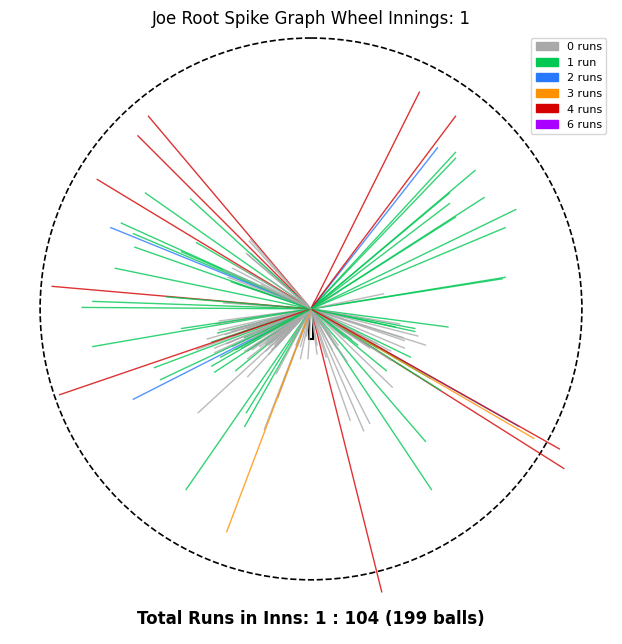

In [28]:
test_match_spike_runs(df, 'Joe Root', 1, [0, 1, 2, 3, 4, 6])

In [9]:
df['batsmanName'].unique()

array(['Brydon Carse', 'Shoaib Bashir', 'Jofra Archer', 'Jamie Smith',
       'Chris Woakes', 'Joe Root', 'Ben Stokes', 'Harry Brook',
       'Ollie Pope', 'Zak Crawley', 'Ben Duckett', 'KL Rahul',
       'Rishabh Pant', 'Shubman Gill', 'Karun Nair', 'Yashasvi Jaiswal'],
      dtype=object)

In [19]:
# df['shotControl']

In [ ]:
# # now we have to apply -1 to shotControl column means
# df['shotControl'] = df['shotControl'] - 1
# df['shotControl']

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
933    0.0
934    0.0
935    0.0
936    0.0
937    0.0
Name: shotControl, Length: 938, dtype: float64

In [20]:
# df.to_csv('day2-comm.csv', index=False)

In [25]:
# method 5 (updated with filters and extended stats)
def test_match_spike_runs(df, player_name, inns, run_values, bowler_name=None, year=None, date_range=None):
    # Filter by player and innings
    local_df = df[(df['batsmanName'] == player_name) & (df['inningNumber'] == inns)].copy()

    # Optional filters
    if bowler_name:
        local_df = local_df[local_df['bowlerName'] == bowler_name]

    if year:
        local_df = local_df[local_df['title'].str.contains(str(year), na=False)]

    if date_range:
        start_date, end_date = date_range
        local_df['match_date'] = pd.to_datetime(local_df['title'].str.extract(r'(\d{4}-\d{2}-\d{2})')[0], errors='coerce')
        local_df = local_df[(local_df['match_date'] >= pd.to_datetime(start_date)) & (local_df['match_date'] <= pd.to_datetime(end_date))]


    if local_df.empty:
        print(f"No data found for {player_name} in innings {inns} for selected filters.")
        return

    # Calculate balls faced BEFORE filtering by run values
    balls_faced_df = local_df[
        (local_df['wides'] == 0)
    ]
    total_balls = balls_faced_df.shape[0]

    # Now filter for plotting and scoring
    player_data = local_df[
        (local_df['batsmanRuns'].isin(run_values)) &
        ~((local_df['wagonX'] == 0) & (local_df['wagonY'] == 0))
    ].copy()

    # player_data = balls_faced_df.copy()
    # balls_faced_df = balls_faced_df.shape[0]

    player_data = local_df[
        (local_df['batsmanRuns'].isin(run_values)) &
        ~((local_df['wagonX'] == 0) & (local_df['wagonY'] == 0))
    ].copy()
    # Calculate total stats
    total_runs = player_data['batsmanRuns'].sum()
    total_balls = player_data.shape[0]
    total_4s = player_data['isFour'].sum()
    total_6s = player_data['isSix'].sum()
    control_pct = round((player_data['shotControl'].mean()) * 100, 2)

    # Most productive shot
    shot_agg = player_data.groupby('shotType').agg({
        'batsmanRuns': 'sum',
        'isFour': 'sum',
        'isSix': 'sum'
    }).sort_values(by='batsmanRuns', ascending=False).reset_index()
    most_productive_shot = shot_agg.iloc[0] if not shot_agg.empty else None

    # Plot setup
    score_colors = {
        0: '#A9A9A9', 1: '#00C853', 2: '#2979FF',
        3: '#FF9100', 4: '#D50000', 6: '#AA00FF'
    }
    player_data['color'] = player_data['batsmanRuns'].map(score_colors).fillna('black')

    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_facecolor("white")
    center_x, center_y = 180, 164

    for _, row in player_data.iterrows():
        ax.plot([center_x, row['wagonX']], [center_y, row['wagonY']],
                color=row['color'], linewidth=1.0, alpha=0.8)

    boundary = plt.Circle((center_x, center_y), 180, color='black', fill=False, linestyle='--', linewidth=1.2)
    ax.add_artist(boundary)

    pitch = plt.Rectangle((center_x - 1.5, center_y), 3, 20.12, edgecolor='black', facecolor='none', linewidth=1.5)
    ax.add_artist(pitch)

    def get_quadrant(x, y):
        angle = np.arctan2(y - center_y, x - center_x)
        degree = (np.degrees(angle) + 360) % 360
        return int(degree // 45)

    player_data['quadrant'] = player_data.apply(lambda row: get_quadrant(row['wagonX'], row['wagonY']), axis=1)

    quadrant_totals = [0] * 8
    total_score = 0
    for q in range(8):
        q_score = player_data[player_data['quadrant'] == q]['batsmanRuns'].sum()
        quadrant_totals[q] = q_score
        total_score += q_score

    ax.set_xlim(-20, 380)
    ax.set_ylim(-20, 380)
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_xticklabels([]), ax.set_yticklabels([])
    ax.set_aspect('equal', adjustable='box')

    title = f"{player_name} Spike Graph Wheel\nInnings: {inns}"
    if bowler_name:
        title += f" vs {bowler_name}"
    ax.set_title(title, fontsize=12)

    ax.text(180, 360, f"Total Runs: {total_runs} | Balls: {total_balls} | 4s: {total_4s} | 6s: {total_6s}",
            fontsize=11, ha='center', va='center', fontweight='bold', color='black')

    ax.text(180, 375, f"Control%: {control_pct}%", fontsize=11, ha='center', color='darkblue')

    if most_productive_shot is not None:
        ax.text(180, 390,
                f"Most Productive Shot: {most_productive_shot['shotType']} ({most_productive_shot['batsmanRuns']} runs, 4s: {most_productive_shot['isFour']}, 6s: {most_productive_shot['isSix']})",
                fontsize=11, ha='center', color='green')

    ax.invert_yaxis()
    ax.set_axis_off()

    legend_elements = [
        mpatches.Patch(color=color, label=f'{score} run' + ('s' if score != 1 else ''))
        for score, color in score_colors.items() if score in run_values
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=8)

    plt.subplots_adjust(left=0.05, right=0.95, top=0.93, bottom=0.07)
    plt.show()


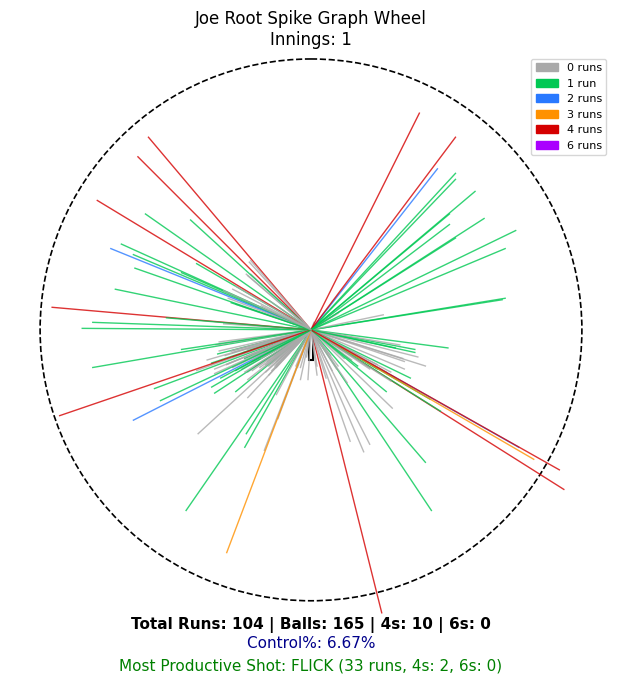

In [26]:
test_match_spike_runs(df, 'Joe Root', 1, [0, 1, 2, 3, 4, 6],None, None, None)

In [18]:
df['shotControl'].unique()

array([ 1.,  0., nan])

In [71]:
# method 5
def test_match_spike_runs(df, player_name, inns, run_values, bowler_name=None):
    # Filter by match, player, and innings
    local_df = df[
        (df['batsmanName'] == player_name) & (df['inningNumber'] == inns)
    ].copy()

    if bowler_name:
        local_df = local_df[local_df['bowlerName'] == bowler_name]

    balls_faced_df = local_df[
        (local_df['batsmanName'] == player_name) & (local_df['wides'] == 0)
    ][['batsmanName', 'wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()

    # Filter valid shot points and run values
    player_data = local_df[
        (~((local_df['wagonX'] == 0) & (local_df['wagonY'] == 0))) &
        (local_df['batsmanRuns'].isin(run_values))
    ][['wagonX', 'wagonY', 'teamRuns', 'batsmanRuns', 'isFour', 'isSix', 'shotControl']].dropna()

    if player_data.empty:
        print(f"No data found for {player_name} in this match and innings {inns} for selected runs {run_values}")
        return

    # === Additional Stats ===
    total_4s = player_data['isFour'].sum()
    total_6s = player_data['isSix'].sum()
    # control_pct = round(player_data['shotControl'].mean() * 100, 2)
    # control_pct = round((player_data['shotControl'] == 0).sum() / balls_faced_df.shape[0] * 100, 2)
    control_pct = round((local_df[(local_df['wides'] == 0) & (local_df['shotControl'] == 0)].shape[0]) / balls_faced_df.shape[0] * 100, 2)
    # valid_balls = df[
    #     (df['batsmanName'] == player_name) &
    #     (df['inningNumber'] == inns) &
    #     (df['wides'] == 0)
    # ]

    # if bowler_name:
    #     valid_balls = valid_balls[valid_balls['bowlerName'] == bowler_name]

    # control_pct = round((valid_balls['shotControl'] == 1).sum() / valid_balls.shape[0] * 100, 2)


    # Color map
    score_colors = {
        0: '#A9A9A9',
        1: '#00C853',
        2: '#2979FF',
        3: '#FF9100',
        4: '#D50000',
        6: '#AA00FF'
    }
    player_data['color'] = player_data['batsmanRuns'].map(score_colors).fillna('black')

    # Plot setup
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_facecolor("white")
    center_x, center_y = 180, 164

    # Draw lines
    for _, row in player_data.iterrows():
        ax.plot([center_x, row['wagonX']], [center_y, row['wagonY']],
                color=row['color'], linewidth=1.0, alpha=0.8)

    # Boundary
    boundary = plt.Circle((center_x, center_y), 180, color='black',
                          fill=False, linestyle='--', linewidth=1.2)
    ax.add_artist(boundary)

    # Pitch
    pitch = plt.Rectangle((center_x - 1.5, center_y), 3, 20.12,
                          edgecolor='black', facecolor='none', linewidth=1.5)
    ax.add_artist(pitch)

    # Quadrants
    def get_quadrant(x, y):
        angle = np.arctan2(y - center_y, x - center_x)
        degree = (np.degrees(angle) + 360) % 360
        return int(degree // 45)

    player_data['quadrant'] = player_data.apply(
        lambda row: get_quadrant(row['wagonX'], row['wagonY']), axis=1
    )

    # Quadrant scores
    quadrant_totals = [0] * 8
    total_score = 0
    for q in range(8):
        q_score = player_data[player_data['quadrant'] == q]['batsmanRuns'].sum()
        quadrant_totals[q] = q_score
        total_score += q_score

    # Layout
    ax.set_xlim(-20, 380)
    ax.set_ylim(-20, 380)
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_xticklabels([]), ax.set_yticklabels([])
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"{player_name} Spike Graph Wheel Innings: {inns}", fontsize=12)

    ax.text(180, 360, f"Total Runs: {total_score} ({balls_faced_df.shape[0]} balls)",
            fontsize=11, ha='center', fontweight='bold')
    ax.text(180, 375, f"4s: {total_4s} | 6s: {total_6s} | Control%: {control_pct}%",
            fontsize=11, ha='center', color='darkgreen')

    ax.invert_yaxis()
    ax.set_axis_off()

    # Legend
    legend_elements = [
        mpatches.Patch(color=color, label=f'{score} run' + ('s' if score != 1 else ''))
        for score, color in score_colors.items() if score in run_values
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=8)

    plt.subplots_adjust(left=0.05, right=0.95, top=0.93, bottom=0.07)
    # plt.close(fig)
    # return fig
    plt.show()


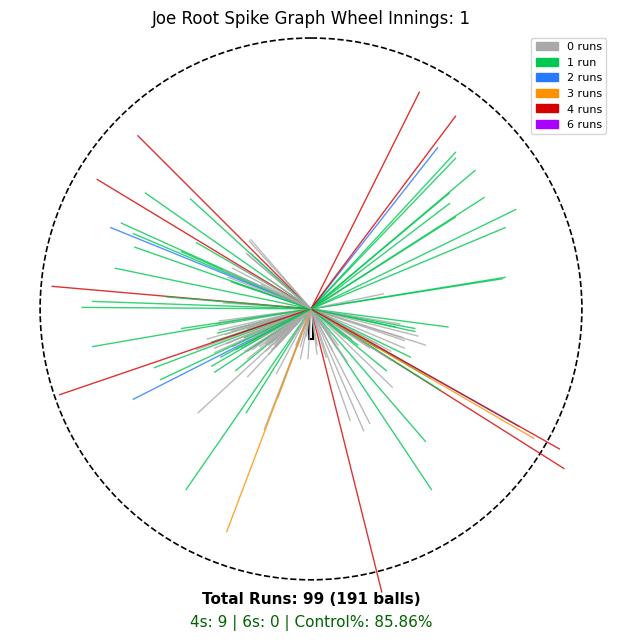

In [72]:
# test_match_spike_runs(df, player_name, inns, run_values, bowler_name=None)
test_match_spike_runs(test, 'Joe Root', 1, [0,1,2,3,4,5,6],None)

# Correct and finalised code
### update with productive shot:

In [ ]:
# method 5
def test_match_spike_runs(df, player_name, inns, run_values=None, bowler_name=None, transparent=False):
    # Filter by match, player, and innings
    local_df = df[
        (df['batsmanName'] == player_name) & (df['inningNumber'] == inns)
    ].copy()

    if bowler_name:
        local_df = local_df[local_df['bowlerName'] == bowler_name]

    # This keeps a copy of the full innings shot data (unfiltered)
    all_shots_data = local_df[
        ~((local_df['wagonX'] == 0) & (local_df['wagonY'] == 0))
    ][['wagonX', 'wagonY', 'teamRuns', 'batsmanRuns', 'isFour', 'isSix', 'shotControl', 'shotType']].dropna()

    # Apply run filter
    if run_values is None:
        filtered_df = local_df.copy()
    else:
        filtered_df = local_df[local_df['batsmanRuns'].isin(run_values)]

    # Shots without wides (based on filtered data now)
    balls_faced_df = filtered_df[
        (filtered_df['wides'] == 0)
    ][['batsmanName', 'wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()

    # Handle run_values = None to include all run types

    # Filter valid shot points
    player_data = filtered_df[
        ~((filtered_df['wagonX'] == 0) & (filtered_df['wagonY'] == 0))
    ][['wagonX', 'wagonY', 'teamRuns', 'batsmanRuns', 'isFour', 'isSix', 'shotControl', 'shotType']].dropna()

    if player_data.empty:
        print(f"No data found for {player_name} in this match and innings {inns} for selected runs {run_values}")
        return

    # === Additional Stats ===
    total_4s = player_data['isFour'].sum()
    total_6s = player_data['isSix'].sum()
    # control_pct = round(player_data['shotControl'].mean() * 100, 2)
    # control_pct = round((player_data['shotControl'] == 0).sum() / balls_faced_df.shape[0] * 100, 2)
    # control_pct = round((filtered_df[(filtered_df['wides'] == 0) & (filtered_df['shotControl'] == 0)].shape[0]) / balls_faced_df.shape[0] * 100, 2)
    # control_pct = round(player_data['shotControl'].mean() * 100, 2)
    # control_pct = round((player_data['shotControl'] == 0).sum() / balls_faced_df.shape[0] * 100, 2)
    # control_pct = round((filtered_df[(filtered_df['wides'] == 0) & (filtered_df['shotControl'] == 0)].shape[0]) / balls_faced_df.shape[0] * 100, 2)
    valid_balls = local_df[local_df['wides'] == 0]
    controlled_balls = valid_balls[valid_balls['shotControl'] == 0]
    control_pct = round(len(controlled_balls) / len(valid_balls) * 100, 2)
    # valid_balls = df[
    #     (df['batsmanName'] == player_name) &
    #     (df['inningNumber'] == inns) &
    #     (df['wides'] == 0)
    # ]

    # if bowler_name:
    #     valid_balls = valid_balls[valid_balls['bowlerName'] == bowler_name]

    # control_pct = round((valid_balls['shotControl'] == 1).sum() / valid_balls.shape[0] * 100, 2)

    # Most productive shot calculation
    if 'shotType' in all_shots_data.columns and not all_shots_data.empty:
    # if 'shotType' in player_data.columns and not player_data.empty:
        shot_summary = all_shots_data.groupby('shotType').agg({
            'batsmanRuns': 'sum',
            'isFour': 'sum',
            'isSix': 'sum'
        }).sort_values(by='batsmanRuns', ascending=False)

        if not shot_summary.empty:
            top_shot = shot_summary.iloc[0]
            top_shot_type = shot_summary.index[0]
            most_prod_shot_text = (
                f"{top_shot_type}: {int(top_shot['batsmanRuns'])} runs, "
                f"{int(top_shot['isFour'])}x4s, {int(top_shot['isSix'])}x6s"
            )
        else:
            most_prod_shot_text = "No productive shot data"
    else:
        most_prod_shot_text = "No shot type data"

    # Color map
    score_colors = {
        0: '#A9A9A9',
        1: '#00C853',
        2: '#2979FF',
        3: '#FF9100',
        4: '#D50000',
        6: '#AA00FF'
    }
    player_data['color'] = player_data['batsmanRuns'].map(score_colors).fillna('black')

    # Plot setup
    # fig, ax = plt.subplots(figsize=(7, 7))
    # ax.set_facecolor("white")
    fig, ax = plt.subplots(figsize=(7, 7), facecolor='none' if transparent else 'white')
    ax.set_facecolor('none' if transparent else 'white')
    center_x, center_y = 180, 164

    # Draw lines
    for _, row in player_data.iterrows():
        ax.plot([center_x, row['wagonX']], [center_y, row['wagonY']],
                color=row['color'], linewidth=1.0, alpha=0.8)

    # Boundary
    # boundary = plt.Circle((center_x, center_y), 175, color='black',
    #                       fill=False, linestyle='--', linewidth=1.2)
    # ax.add_artist(boundary)

    # Pitch
    pitch = plt.Rectangle((center_x - 1.5, center_y), 3, 20.12,
                          edgecolor='black', facecolor='none', linewidth=1.5)
    ax.add_artist(pitch)

    # Quadrants
    def get_quadrant(x, y):
        angle = np.arctan2(y - center_y, x - center_x)
        degree = (np.degrees(angle) + 360) % 360
        return int(degree // 45)

    player_data['quadrant'] = player_data.apply(
        lambda row: get_quadrant(row['wagonX'], row['wagonY']), axis=1
    )

    # Quadrant scores
    quadrant_totals = [0] * 8
    total_score = 0
    for q in range(8):
        q_score = player_data[player_data['quadrant'] == q]['batsmanRuns'].sum()
        quadrant_totals[q] = q_score
        total_score += q_score

    # Layout
    ax.set_xlim(-20, 380)
    ax.set_ylim(-20, 410)
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_xticklabels([]), ax.set_yticklabels([])
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"{player_name} Spike Graph Wheel Innings: {inns}", fontsize=12)

    ax.text(180, 360, f"Total Runs: {total_score} ({balls_faced_df.shape[0]} balls)",
            fontsize=11, ha='center', fontweight='bold')
    ax.text(180, 375, f"4s: {total_4s} | 6s: {total_6s}",
            fontsize=11, ha='center', color='darkgreen')
    ax.text(180, 390, f"Control: {control_pct}%",
            fontsize=11, ha='center', color='purple')
    ax.text(180, 405, f"Most Productive Shot: {most_prod_shot_text}",
            fontsize=11, ha='center', color='navy')

    ax.invert_yaxis()
    ax.set_axis_off()

    # Legend
    legend_elements = [
        mpatches.Patch(color=color, label=f'{score} run' + ('s' if score != 1 else ''))
        for score, color in score_colors.items() if run_values is None or score in run_values
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=8)

    plt.subplots_adjust(left=0.05, right=0.95, top=0.93, bottom=0.07)
    # plt.close(fig)
    # return fig
    plt.show()

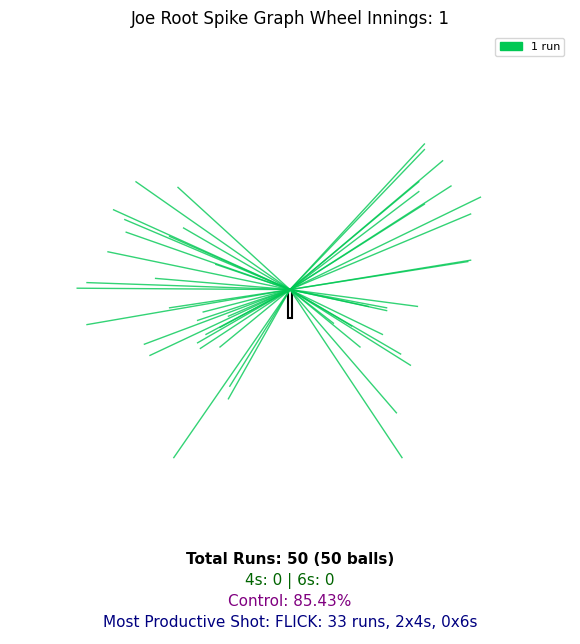

In [28]:
test_match_spike_runs(df, 'Joe Root', 1, [1],None,False)

# update with background image

In [4]:
import matplotlib.image as mpimg

In [5]:
# method 5
def test_match_spike_runs(df, player_name, inns, run_values=None, bowler_name=None, transparent=False):
    # Filter by match, player, and innings
    local_df = df[
        (df['batsmanName'] == player_name) & (df['inningNumber'] == inns)
    ].copy()

    if bowler_name:
        local_df = local_df[local_df['bowlerName'] == bowler_name]

    # This keeps a copy of the full innings shot data (unfiltered)
    all_shots_data = local_df[
        ~((local_df['wagonX'] == 0) & (local_df['wagonY'] == 0))
    ][['wagonX', 'wagonY', 'teamRuns', 'batsmanRuns', 'isFour', 'isSix', 'shotControl', 'shotType']].dropna()

    # Apply run filter
    if run_values is None:
        filtered_df = local_df.copy()
    else:
        filtered_df = local_df[local_df['batsmanRuns'].isin(run_values)]

    # Shots without wides (based on filtered data now)
    balls_faced_df = filtered_df[
        (filtered_df['wides'] == 0)
    ][['batsmanName', 'wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()

    # Handle run_values = None to include all run types

    # Filter valid shot points
    player_data = filtered_df[
        ~((filtered_df['wagonX'] == 0) & (filtered_df['wagonY'] == 0))
    ][['wagonX', 'wagonY', 'teamRuns', 'batsmanRuns', 'isFour', 'isSix', 'shotControl', 'shotType']].dropna()

    if player_data.empty:
        print(f"No data found for {player_name} in this match and innings {inns} for selected runs {run_values}")
        return

    # === Additional Stats ===
    total_4s = player_data['isFour'].sum()
    total_6s = player_data['isSix'].sum()
    # control_pct = round(player_data['shotControl'].mean() * 100, 2)
    # control_pct = round((player_data['shotControl'] == 0).sum() / balls_faced_df.shape[0] * 100, 2)
    # control_pct = round((filtered_df[(filtered_df['wides'] == 0) & (filtered_df['shotControl'] == 0)].shape[0]) / balls_faced_df.shape[0] * 100, 2)
    # control_pct = round(player_data['shotControl'].mean() * 100, 2)
    # control_pct = round((player_data['shotControl'] == 0).sum() / balls_faced_df.shape[0] * 100, 2)
    # control_pct = round((filtered_df[(filtered_df['wides'] == 0) & (filtered_df['shotControl'] == 0)].shape[0]) / balls_faced_df.shape[0] * 100, 2)
    valid_balls = local_df[local_df['wides'] == 0]
    controlled_balls = valid_balls[valid_balls['shotControl'] == 0]
    control_pct = round(len(controlled_balls) / len(valid_balls) * 100, 2)
    # valid_balls = df[
    #     (df['batsmanName'] == player_name) &
    #     (df['inningNumber'] == inns) &
    #     (df['wides'] == 0)
    # ]

    # if bowler_name:
    #     valid_balls = valid_balls[valid_balls['bowlerName'] == bowler_name]

    # control_pct = round((valid_balls['shotControl'] == 1).sum() / valid_balls.shape[0] * 100, 2)

    # Most productive shot calculation
    if 'shotType' in all_shots_data.columns and not all_shots_data.empty:
    # if 'shotType' in player_data.columns and not player_data.empty:
        shot_summary = all_shots_data.groupby('shotType').agg({
            'batsmanRuns': 'sum',
            'isFour': 'sum',
            'isSix': 'sum'
        }).sort_values(by='batsmanRuns', ascending=False)

        if not shot_summary.empty:
            top_shot = shot_summary.iloc[0]
            top_shot_type = shot_summary.index[0]
            most_prod_shot_text = (
                f"{top_shot_type}: {int(top_shot['batsmanRuns'])} runs, "
                f"{int(top_shot['isFour'])}x4s, {int(top_shot['isSix'])}x6s"
            )
        else:
            most_prod_shot_text = "No productive shot data"
    else:
        most_prod_shot_text = "No shot type data"

    # Color map
    # score_colors = {
    #     0: '#A9A9A9',
    #     1: '#00C853',
    #     2: '#2979FF',
    #     3: '#FF9100',
    #     4: '#D50000',
    #     6: '#AA00FF'
    # }
    score_colors = {
        # 0: '#A9A9A9',
        0: '#FFFFFF',   # White (dot balls)
        1: '#00C853',
        2: '#2979FF',
        3: '#FF9100',
        5: '#C62828',  # Dark Red
        4: '#D50000',
        6: '#AA00FF'
    }
    player_data['color'] = player_data['batsmanRuns'].map(score_colors).fillna('black')

    # Plot setup
    # fig, ax = plt.subplots(figsize=(7, 7))
    # ax.set_facecolor("white")
    
    fig, ax = plt.subplots(figsize=(7, 7), facecolor='none' if transparent else 'white')
    ax.set_facecolor('none' if transparent else 'white')
    center_x, center_y = 180, 164

    # ⬇️ Add background image
    if not transparent:
        bg_img = mpimg.imread("ground_high_res.png")  # Make sure this path is correct
        ax.imshow(bg_img, extent=[0, 360, 0, 360], aspect='auto', zorder=0)

    # Draw lines
    for _, row in player_data.iterrows():
        ax.plot([center_x, row['wagonX']], [center_y, row['wagonY']],
                color=row['color'], linewidth=1.0, alpha=0.8, zorder=1)

    # Draw lines
    # for _, row in player_data.iterrows():
    #     ax.plot([center_x, row['wagonX']], [center_y, row['wagonY']],
    #             color=row['color'], linewidth=1.0, alpha=0.8)

    # Boundary
    # boundary = plt.Circle((center_x, center_y), 175, color='black',
    #                       fill=False, linestyle='--', linewidth=1.2)
    # ax.add_artist(boundary)

    # Pitch
    pitch = plt.Rectangle((center_x - 1.5, center_y), 3, 20.12,
                          edgecolor='black', facecolor='none', linewidth=1.5)
    ax.add_artist(pitch)

    # Quadrants
    def get_quadrant(x, y):
        angle = np.arctan2(y - center_y, x - center_x)
        degree = (np.degrees(angle) + 360) % 360
        return int(degree // 45)

    player_data['quadrant'] = player_data.apply(
        lambda row: get_quadrant(row['wagonX'], row['wagonY']), axis=1
    )

    # Quadrant scores
    quadrant_totals = [0] * 8
    total_score = 0
    for q in range(8):
        q_score = player_data[player_data['quadrant'] == q]['batsmanRuns'].sum()
        quadrant_totals[q] = q_score
        total_score += q_score

    # Layout
    ax.set_xlim(-20, 380)
    ax.set_ylim(-20, 420)
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_xticklabels([]), ax.set_yticklabels([])
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"{player_name} Spike Graph Wheel Innings: {inns}", fontsize=12)

    ax.text(180, 375, f"Total Runs: {total_score} ({balls_faced_df.shape[0]} balls)",
            fontsize=11, ha='center', fontweight='bold')
    ax.text(180, 390, f"4s: {total_4s} | 6s: {total_6s}",
            fontsize=11, ha='center', color='darkgreen')
    ax.text(180, 400, f"Control: {control_pct}%",
            fontsize=11, ha='center', color='purple')
    ax.text(180, 415, f"Most Productive Shot: {most_prod_shot_text}",
            fontsize=11, ha='center', color='navy')

    ax.invert_yaxis()
    ax.set_axis_off()

    # Legend
    legend_elements = [
        mpatches.Patch(color=color, label=f'{score} run' + ('s' if score != 1 else ''))
        for score, color in score_colors.items() if run_values is None or score in run_values
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=8)

    plt.subplots_adjust(left=0.05, right=0.95, top=0.93, bottom=0.07)
    # plt.close(fig)
    # return fig
    plt.show()

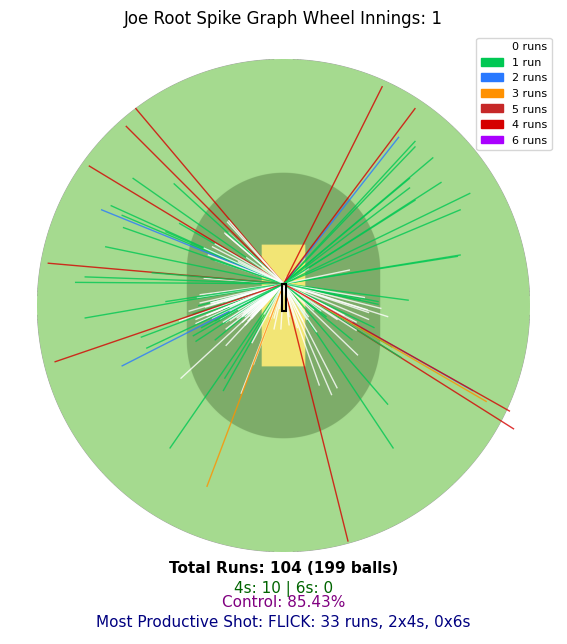

In [6]:
test_match_spike_runs(df, 'Joe Root', 1, None,None,False)

# with the filters to show the information or not in this code:

In [6]:
df.columns

Index(['TestNum', 'inningNumber', 'oversUnique', 'oversActual', 'overNumber',
       'teamRuns', 'batsmanRuns', 'isFour', 'isSix', 'isWicket',
       'dismissalType', 'byes', 'legbyes', 'wides', 'noballs', 'penalties',
       'wagonX', 'wagonY', 'wagonZone', 'pitchLine', 'pitchLength', 'shotType',
       'shotControl', 'totalInningRuns', 'totalInningWickets', 'title',
       'Batter', 'batTeamID', 'Bowler', 'bowlTeamID'],
      dtype='object')

In [9]:
# rename the batter and bowler columns
df.rename(columns={'Batter': 'batsmanName', 'Bowler': 'bowlerName'}, inplace=True)

-  we will alot team_bat with batTeamID
-  1 is ENG and 6 is IND

In [31]:
df['shotControl'].unique()

array([ 2.,  1., nan])

In [27]:

# Initialize columns
df['team_bat'] = None
df['team_bowl'] = None

# if batTeamID is 1, then team_bat is 'England' and team_bowl is 'India'
df.loc[df['batTeamID'] == 1, ['team_bat', 'team_bowl']] = ['ENG', 'IND']
df.loc[df['batTeamID'] == 6, ['team_bat', 'team_bowl']] = ['IND', 'ENG']

In [28]:
df.columns

Index(['TestNum', 'inningNumber', 'oversUnique', 'oversActual', 'overNumber',
       'teamRuns', 'batsmanRuns', 'isFour', 'isSix', 'isWicket',
       'dismissalType', 'byes', 'legbyes', 'wides', 'noballs', 'penalties',
       'wagonX', 'wagonY', 'wagonZone', 'pitchLine', 'pitchLength', 'shotType',
       'shotControl', 'totalInningRuns', 'totalInningWickets', 'title',
       'batsmanName', 'batTeamID', 'bowlerName', 'bowlTeamID', 'team_bat',
       'team_bowl'],
      dtype='object')

In [30]:
df.to_csv('ENGvIND_Test_Series.csv', index=False)

In [ ]:
# method 5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from io import BytesIO
import matplotlib.image as mpimg


# def test_match_spike_runs(df, player_name, inns, run_values=None, bowler_name=None, transparent=False):
def test_match_spike_runs(
    df, player_name,  inns,test_num = None, run_values=None, bowler_name=None, transparent=False,
    show_title=True, show_legend=True, show_summary=True,
    show_fours_sixes=True, show_control=True, show_prod_shot=True, runs_count=True
):
    score_colors = {
        # 0:  '#F70000',   
        0:  '#ff4d4d',   
        1:  '#8c8c8c',   
        2:  '#F3E139',   
        3:  '#D16FBC',   
        4:  '#0B9B67',
        5:  '#3964D0',   
        6:  '#7A41D8',   
    }
    # Filter by match, player, and innings
    # local_df = df[
    #     (df['batsmanName'] == player_name) &
    #     (df['TestNum']== test_num) &
    #     (df['inningNumber'] == inns) if test_num is not None else True
    # ].copy()
    local_df = df[
        (df['batsmanName'] == player_name)
    ].copy()

    if test_num is not None:
        local_df = local_df[local_df['TestNum'] == test_num]

    local_df = local_df[local_df['inningNumber'] == inns]

    # === Total Innings Summary ===
    innings_valid_balls = local_df[local_df['wides'] == 0]
    innings_runs = innings_valid_balls['batsmanRuns'].sum()
    innings_balls = innings_valid_balls.shape[0]
    innings_4s = innings_valid_balls['isFour'].sum()
    innings_6s = innings_valid_balls['isSix'].sum()

    if bowler_name:
        local_df = local_df[local_df['bowlerName'] == bowler_name]

    # we have to calculate the team_bowl, by seeing the batsman_name and team_bats, the bowling team is the opposite of batting team
    team_bats = local_df['team_bat'].unique()[0]
    team_bowls = local_df['team_bowl'].unique()[0]
    if team_bats == 'IND':
        team_bowl = 'ENG'
    elif team_bats == 'ENG':
        team_bowl = 'IND'
    
    # This keeps a copy of the full innings shot data (unfiltered)
    all_shots_data = local_df[
        ~((local_df['wagonX'] == 0) & (local_df['wagonY'] == 0))
    ][['wagonX', 'wagonY', 'teamRuns', 'batsmanRuns', 'isFour', 'isSix', 'shotControl', 'shotType']].dropna()

    # Apply run filter
    if run_values is None:
        filtered_df = local_df.copy()
    else:
        filtered_df = local_df[local_df['batsmanRuns'].isin(run_values)]

    # Shots without wides (based on filtered data now)
    balls_faced_df = filtered_df[
        (filtered_df['wides'] == 0)
    ][['batsmanName', 'wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()

    # Handle run_values = None to include all run types

    # Filter valid shot points
    player_data = filtered_df[
        ~((filtered_df['wagonX'] == 0) & (filtered_df['wagonY'] == 0))
    ][['wagonX', 'wagonY', 'teamRuns', 'batsmanRuns', 'isFour', 'isSix', 'shotControl', 'shotType']].dropna()

    # if player_data.empty:
    #     print(f"No data found for {player_name} in this match and innings {inns} for selected runs {run_values}")
    #     return
    if player_data.empty:
        player_data_sorted = pd.DataFrame()  # Set to empty for drawing logic below
    else:
        player_data_sorted = player_data.sort_values(by='batsmanRuns')
        player_data['color'] = player_data['batsmanRuns'].map(score_colors).fillna('black')


    # === Additional Stats ===
    total_4s = player_data['isFour'].sum()
    total_6s = player_data['isSix'].sum()
    # control_pct = round(player_data['shotControl'].mean() * 100, 2)
    # control_pct = round((player_data['shotControl'] == 0).sum() / balls_faced_df.shape[0] * 100, 2)
    # control_pct = round((filtered_df[(filtered_df['wides'] == 0) & (filtered_df['shotControl'] == 0)].shape[0]) / balls_faced_df.shape[0] * 100, 2)
    # control_pct = round(player_data['shotControl'].mean() * 100, 2)
    # control_pct = round((player_data['shotControl'] == 0).sum() / balls_faced_df.shape[0] * 100, 2)
    # control_pct = round((filtered_df[(filtered_df['wides'] == 0) & (filtered_df['shotControl'] == 0)].shape[0]) / balls_faced_df.shape[0] * 100, 2)
    valid_balls = local_df[local_df['wides'] == 0]
    # controlled_balls = valid_balls[valid_balls['shotControl'] == 0]
    controlled_balls = valid_balls[valid_balls['shotControl'] ==1]
    control_pct = round(len(controlled_balls) / len(valid_balls) * 100, 2)
    # valid_balls = df[
    #     (df['batsmanName'] == player_name) &
    #     (df['inningNumber'] == inns) &
    #     (df['wides'] == 0)
    # ]

    # if bowler_name:
    #     valid_balls = valid_balls[valid_balls['bowlerName'] == bowler_name]

    # control_pct = round((valid_balls['shotControl'] == 1).sum() / valid_balls.shape[0] * 100, 2)

    # total_runs_count = player_data['batsmanRuns'].sum() if runs_count else None
    # Most productive shot calculation
    if 'shotType' in all_shots_data.columns and not all_shots_data.empty:
    # if 'shotType' in player_data.columns and not player_data.empty:
        shot_summary = all_shots_data.groupby('shotType').agg({
            'batsmanRuns': 'sum',
            'isFour': 'sum',
            'isSix': 'sum'
        }).sort_values(by='batsmanRuns', ascending=False)

        if not shot_summary.empty:
            top_shot = shot_summary.iloc[0]
            top_shot_type = shot_summary.index[0]
            most_prod_shot_text = (
                f"{top_shot_type}: {int(top_shot['batsmanRuns'])} runs,\n"
                f"4s: {int(top_shot['isFour'])}, 6s: {int(top_shot['isSix'])}"
            )
        else:
            most_prod_shot_text = "No productive shot data"
    else:
        most_prod_shot_text = "No shot type data"

    # Color map
    # score_colors = {
    #     # 0: '#A9A9A9',
    #     0: '#FFFFFF',   # White (dot balls)
    #     1: '#00C853',
    #     2: '#2979FF',
    #     3: '#FF9100',
    #     5: '#C62828',  # Dark Red
    #     4: '#D50000',
    #     6: '#AA00FF'
    # }

    # player_data['color'] = player_data['batsmanRuns'].map(score_colors).fillna('black')
    if not player_data.empty:
        player_data['color'] = player_data['batsmanRuns'].map(score_colors).fillna('black')
    else:
        player_data['color'] = pd.Series(dtype='str')

    # Plot setup
    # fig, ax = plt.subplots(figsize=(7, 7))
    # ax.set_facecolor("white")
    fig, ax = plt.subplots(figsize=(7, 7), facecolor='none' if transparent else 'white')
    ax.set_facecolor('none' if transparent else 'white')
    center_x, center_y = 180, 164

     # Add background image
    if not transparent:
        bg_img = mpimg.imread("ground_high_res.png")  # Make sure this path is correct
        ax.imshow(bg_img, extent=[0, 360, 20, 360], aspect='auto', zorder=0)

    # Sort shots so 0s are drawn first, 6s last (so 6s are on top)
    player_data_sorted = player_data.sort_values(by='batsmanRuns')

    # Optional: define different line widths based on run value
    run_widths = {
        0: 1.5,
        1: 2.0,
        2: 2.0,
        3: 2.0,
        4: 3.0,
        5: 2.0,
        6: 3.0
    }

    # Draw the lines in sorted order
    # for _, row in player_data_sorted.iterrows():
    #     lw = run_widths.get(row['batsmanRuns'], 1.0)  # default width = 1.0 if not defined
    #     ax.plot(
    #         [center_x, row['wagonX']], [center_y, row['wagonY']],
    #         color=row['color'], linewidth=lw, alpha=0.8, zorder=1
    #     )
    if not player_data_sorted.empty:
        for _, row in player_data_sorted.iterrows():
            lw = run_widths.get(row['batsmanRuns'], 1.0)
            ax.plot(
                [center_x, row['wagonX']], [center_y, row['wagonY']],
                color=row['color'], linewidth=lw, alpha=0.8, zorder=1
            )
    else:
        ax.text(180, 410, "No shots for selected run(s)", ha='center', fontsize=12, color='red', fontweight='bold')
    # Draw lines
    # for _, row in player_data.iterrows():
    #     ax.plot([center_x, row['wagonX']], [center_y, row['wagonY']],
    #             color=row['color'], linewidth=1.0, alpha=0.8)

    # Boundary
    # boundary = plt.Circle((center_x, center_y), 175, color='black',
    #                       fill=False, linestyle='-', linewidth=1.2)
    # ax.add_artist(boundary)

    # Pitch
    # pitch = plt.Rectangle((center_x - 1.5, center_y), 3, 20.12,
    #                       edgecolor='black', facecolor='none', linewidth=1.5)
    # ax.add_artist(pitch)

    # plot the point (dot) at batter position which is at 180, 164, not rectangle only dot
    #batter position dot
    batter_dot = plt.Circle((center_x, center_y), radius=3, edgecolor='black', facecolor='green', linewidth=1, zorder=2)
    ax.add_artist(batter_dot)
    
    

    # Quadrants
    def get_quadrant(x, y):
        angle = np.arctan2(y - center_y, x - center_x)
        degree = (np.degrees(angle) + 360) % 360
        return int(degree // 45)

    # player_data['quadrant'] = player_data.apply(
    #     lambda row: get_quadrant(row['wagonX'], row['wagonY']), axis=1
    # )
    if not player_data.empty:
        player_data['quadrant'] = player_data.apply(
            lambda row: get_quadrant(row['wagonX'], row['wagonY']), axis=1
        )
    else:
        player_data['quadrant'] = pd.Series(dtype='int')  # Just to prevent downstream errors

    # Quadrant scores
    quadrant_totals = [0] * 8
    total_score = 0
    for q in range(8):
        q_score = player_data[player_data['quadrant'] == q]['batsmanRuns'].sum()
        quadrant_totals[q] = q_score
        total_score += q_score

    # Layout
    # ax.set_xlim(-20, 380)
    # ax.set_ylim(-20, 410)
    # ax.set_xticks([]), ax.set_yticks([])
    # ax.set_xticklabels([]), ax.set_yticklabels([])
    # ax.set_aspect('equal', adjustable='box')
    # ax.set_title(f"{player_name} Spike Graph Wheel Innings: {inns}", fontsize=12)

    # ax.text(180, 360, f"Total Runs: {total_score} ({balls_faced_df.shape[0]} balls)",
    #         fontsize=11, ha='center', fontweight='bold')
    # ax.text(180, 375, f"4s: {total_4s} | 6s: {total_6s}",
    #         fontsize=11, ha='center', color='darkgreen')
    # ax.text(180, 390, f"Control: {control_pct}%",
    #         fontsize=11, ha='center', color='purple')
    # ax.text(180, 405, f"Most Productive Shot: {most_prod_shot_text}",
    #         fontsize=11, ha='center', color='navy')
    ax.set_xlim(-20, 380)
    ax.set_ylim(-30, 420)
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_xticklabels([]), ax.set_yticklabels([])
    ax.set_aspect('equal', adjustable='box')


    # ax.set_title(f"{player_name} Spike Graph Wheel Innings: {inns}", fontsize=12)
    if show_title:
        ax.set_title(f"{player_name} vs {team_bowl} - Test {test_num}, Inns: {inns}".upper(), fontsize=12, fontweight='bold',fontfamily='Segoe UI')

    innings_valid_balls = local_df[local_df['wides'] == 0]
    innings_runs = innings_valid_balls['batsmanRuns'].sum()
    innings_balls = innings_valid_balls.shape[0]
    innings_4s = innings_valid_balls['isFour'].sum()
    innings_6s = innings_valid_balls['isSix'].sum()

    if show_summary:
        ax.text(180, -20, f"Total Runs: {innings_runs} ({innings_balls} balls)",
                fontsize=11, ha='center', fontweight='bold', color='darkgreen')
        ax.text(180, -5, f"Total 4s: {innings_4s} | 6s: {innings_6s}",
                fontsize=11, ha='center', color='darkgreen')
    
    if runs_count:
        ax.text(180, 375, f"{total_score} ({balls_faced_df.shape[0]} balls)",
                fontsize=11, ha='center', fontweight='bold')
    if show_fours_sixes:
        ax.text(180, 388, f"4s: {total_4s} | 6s: {total_6s}",
                fontsize=11, ha='center', color='darkgreen')

    if show_control:
        ax.text(10, 330, f"Control: {control_pct}%",
                fontsize=12, ha='center', color='purple', fontweight='bold')

    if show_prod_shot:
        ax.text(10, 390, f"Productive Shot:\n{most_prod_shot_text}",
                fontsize=11, ha='center', color='navy',fontweight='bold')

    # ax.text(180, 375, f"Total Runs: {total_score} ({balls_faced_df.shape[0]} balls)",
    #         fontsize=11, ha='center', fontweight='bold')
    # ax.text(180, 388, f"4s: {total_4s} | 6s: {total_6s}",
    #         fontsize=11, ha='center', color='darkgreen')
    # ax.text(180, 402, f"Control: {control_pct}%",
    #         fontsize=11, ha='center', color='purple')
    # ax.text(180, 415, f"Most Productive Shot: {most_prod_shot_text}",
    #         fontsize=11, ha='center', color='navy')

    ax.invert_yaxis()
    ax.set_axis_off()

    # Legend
    legend_elements = [
        mpatches.Patch(color=color, label=f'{score} run' + ('s' if score != 1 else ''))
        for score, color in score_colors.items() if run_values is None or score in run_values
    ]

    # ax.legend(handles=legend_elements, loc='upper right', fontsize=8)
    
    if show_legend:
        ax.legend(handles=legend_elements, loc='upper right', fontsize=8)

    plt.subplots_adjust(left=0.05, right=0.95, top=0.93, bottom=0.07)
    # plt.close(fig)
    # return fig
    plt.show()

In [18]:
# test_match_spike_runs(df, 'Ravindra Jadeja', 4, 1,[5],None,False)
test_match_spike_runs(df, 'Joe Root', 1, [1],None,False)

ValueError: ('Lengths must match to compare', (6992,), (1,))

### control percentage

In [23]:
test = pd.read_csv('day1-comm.csv')
test.head()

,inningNumber,oversUnique,oversActual,overNumber,teamRuns,batsmanRuns,isFour,isSix,isWicket,dismissalType,...,pitchLength,shotType,shotControl,totalInningRuns,totalInningWickets,title,batsmanName,bowlerName,team_bat,team_bowl
0,1,82.06,82.6,83,0,0,0,0,0,NaN,...,FULL,DEFENDED,0,251,4,Akash Deep to Stokes,Ben Stokes,Akash Deep,ENG,IND
1,1,82.05,82.5,83,0,0,0,0,0,NaN,...,GOOD_LENGTH,DEFENDED,0,251,4,Akash Deep to Stokes,Ben Stokes,Akash Deep,ENG,IND
2,1,80.06,80.6,81,0,0,0,0,0,NaN,...,GOOD_LENGTH,LEFT_ALONE,0,245,4,Akash Deep to Stokes,Ben Stokes,Akash Deep,ENG,IND
3,1,82.04,82.4,83,1,1,0,0,0,NaN,...,SHORT_OF_A_GOOD_LENGTH,STEERED,0,251,4,Akash Deep to Root,Joe Root,Akash Deep,ENG,IND
4,1,82.03,82.3,83,0,0,0,0,0,NaN,...,FULL,DEFENDED,0,250,4,Akash Deep to Root,Joe Root,Akash Deep,ENG,IND


In [ ]:
def calculate_control_percentage(df, player_name, inns, bowler_name=None):
    # Filter deliveries for player and innings, excluding wides
    valid_balls = df[
        (df['batsmanName'] == player_name) &
        (df['inningNumber'] == inns) &
        (df['wides'] == 0)
    ].copy()

    # Apply optional bowler filter
    if bowler_name:
        valid_balls = valid_balls[valid_balls['bowlerName'] == bowler_name]

    # Drop missing control values (important!)
    valid_balls = valid_balls.dropna(subset=['shotControl'])

    # Convert float to integer
    valid_balls['shotControl'] = valid_balls['shotControl'].astype(int)

    # Calculate control percentage
    total_balls = valid_balls.shape[0]
    controlled = valid_balls['shotControl'].sum()

    if total_balls == 0:
        return 0.0

    control_pct = round((controlled / total_balls) * 100, 2)
    print(f"Balls Faced: {total_balls}, Controlled Shots: {controlled}, Control%: {control_pct}%")
    return control_pct

calculate_control_percentage(test, 'Joe Root', 1, None)

Balls Faced: 191, Controlled Shots: 27, Control%: 14.14%


14.14

In [57]:
df.columns

Index(['inningNumber', 'oversUnique', 'oversActual', 'overNumber', 'teamRuns',
       'batsmanRuns', 'isFour', 'isSix', 'isWicket', 'dismissalType', 'byes',
       'legbyes', 'wides', 'noballs', 'penalties', 'wagonX', 'wagonY',
       'wagonZone', 'pitchLine', 'pitchLength', 'shotType', 'shotControl',
       'totalInningRuns', 'totalInningWickets', 'title', 'batsmanName',
       'bowlerName', 'team_bat', 'team_bowl'],
      dtype='object')

In [50]:
df['shotControl'].unique()

array([ 1.,  0., nan])

In [63]:
df[['oversActual', 'batsmanName', 'batsmanRuns','bowlerName', 'shotType','title','shotControl','isWicket']].tail(12)

,oversActual,batsmanName,batsmanRuns,bowlerName,shotType,title,shotControl,isWicket
926,1.6,Karun Nair,0,Jofra Archer,DEFENDED,Archer to Nair,0.0,0
927,1.5,Karun Nair,0,Jofra Archer,COVER_DRIVE,Archer to Nair,1.0,0
928,1.4,Karun Nair,0,Jofra Archer,LEFT_ALONE,Archer to Nair,0.0,0
929,1.3,Yashasvi Jaiswal,0,Jofra Archer,DEFENDED,Archer to Jaiswal,1.0,1
930,1.2,Yashasvi Jaiswal,0,Jofra Archer,COVER_DRIVE,Archer to Jaiswal,1.0,0
931,1.1,Yashasvi Jaiswal,0,Jofra Archer,DEFENDED,Archer to Jaiswal,0.0,0
932,0.6,KL Rahul,0,Chris Woakes,DEFENDED,Woakes to Rahul,0.0,0
933,0.5,Yashasvi Jaiswal,1,Chris Woakes,SQUARE_DRIVE,Woakes to Jaiswal,0.0,0
934,0.4,Yashasvi Jaiswal,4,Chris Woakes,FLICK,Woakes to Jaiswal,0.0,0
935,0.3,Yashasvi Jaiswal,4,Chris Woakes,STEERED,Woakes to Jaiswal,0.0,0


In [ ]:
def calculate_control_percentage(df, player_name, inns, bowler_name=None):
    # Filter deliveries for player and innings, excluding wides
    valid_balls = df[
        (df['batsmanName'] == player_name) &
        (df['inningNumber'] == inns) &
        (df['wides'] == 0)
    ].copy()

    # Optional filter by bowler
    if bowler_name:
        valid_balls = valid_balls[valid_balls['bowlerName'] == bowler_name]

    # Drop missing values from shotControl
    valid_balls = valid_balls.dropna(subset=['shotControl'])

    # Convert to integer if needed
    valid_balls['shotControl'] = valid_balls['shotControl'].astype(int)

    total_balls = valid_balls.shape[0]
    in_control = (valid_balls['shotControl'] == 0).sum()

    if total_balls == 0:
        return 0.0

    control_pct = round((in_control / total_balls) * 100, 2)
    print(f"Balls Faced: {total_balls}, Controlled Shots: {in_control}, Control%: {control_pct}%")
    return control_pct

calculate_control_percentage(df, 'Joe Root', 1, None)

Balls Faced: 199, Controlled Shots: 170, Control%: 85.43%


85.43

In [65]:
calculate_control_percentage(test, 'Joe Root', 1, None)

Balls Faced: 191, Controlled Shots: 164, Control%: 85.86%


85.86

# wagon wheel zone

In [ ]:
def test_match_wagon(df, player_name, inns):
    # Filter by match, player, and innings
    local_df = df[
        (df['batsmanName'] == player_name) &
        (df['inningNumber'] == inns)  
    ].copy()

    # Set score = 0 for extras without modifying original df
    # extras = ['wide', 'bye', 'leg bye']
    # local_df.loc[local_df['outcome'].str.lower().isin(extras), 'teamRuns'] = 0

    # playing_team = local_df['team_bat'].iloc[0] if not local_df.empty else "Unknown"
    # opponent_team = local_df['team_bowl'].iloc[0] if not local_df.empty else "Unknown"
    # Filter valid shot points

    balls_faced_df = local_df[
        (local_df['batsmanName'] == player_name) &
        (local_df['wides'] == 0)
    ][['batsmanName', 'wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()

    player_data = local_df[
        ~((local_df['wagonX'] == 0) & (local_df['wagonY'] == 0))
    ][['wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()

    if player_data.empty:
        print(f"No data found for {player_name} in this match,and in innings {inns}")
        return

    # Color map
    score_colors = {
        0: '#A9A9A9',
        1: '#00C853',
        2: '#2979FF',
        3: '#FF9100',
        4: '#D50000',
        6: '#AA00FF'
    }
    # player_data['color'] = player_data['score'].map(score_colors).fillna('black')
    player_data['color'] = player_data['batsmanRuns'].map(score_colors).fillna('black')

    # Plot setup
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_facecolor("white")
    center_x, center_y = 180, 164

    # ax.scatter(player_data['wagonX'], player_data['wagonY'],
    #            c=player_data['color'], s=40, edgecolor='black', linewidth=0.6)

    # Draw lines
    # for _, row in player_data.iterrows():
    #     ax.plot([center_x, row['wagonX']], [center_y, row['wagonY']],
    #             color=row['color'], linewidth=1.0, alpha=0.8)

    # Boundary
    boundary = plt.Circle((center_x, center_y), 180, color='black',
                          fill=False, linestyle='--', linewidth=1.2)
    ax.add_artist(boundary)

    # Pitch
    pitch_length = 20.12
    pitch_width = 3
    pitch = plt.Rectangle((center_x - pitch_width / 2, center_y),
                          pitch_width, pitch_length,
                          edgecolor='black', facecolor='none', linewidth=1.5)
    ax.add_artist(pitch)

    # Quadrants
    for angle in range(0, 360, 45):
        rad = np.deg2rad(angle)
        x_end = center_x + 180 * np.cos(rad)
        y_end = center_y + 180 * np.sin(rad)
        ax.plot([center_x, x_end], [center_y, y_end], color='black', linestyle='--', linewidth=1.3)

    def get_quadrant(x, y):
        angle = np.arctan2(y - center_y, x - center_x)
        degree = (np.degrees(angle) + 360) % 360
        return int(degree // 45)

    player_data['quadrant'] = player_data.apply(
        lambda row: get_quadrant(row['wagonX'], row['wagonY']), axis=1
    )   

    # Quadrant scores
    quadrant_totals = [0] * 8
    total_score = 0
    for q in range(8):
        # q_score = player_data[player_data['quadrant'] == q]['score'].sum()
        q_score = player_data[player_data['quadrant'] == q]['batsmanRuns'].sum()
        quadrant_totals[q] = q_score
        total_score += q_score

    for i in range(8):
        mid_angle = np.deg2rad(i * 45 + 22.5)
        label_x = center_x + 100 * np.cos(mid_angle)
        label_y = center_y + 100 * np.sin(mid_angle)
        ax.text(label_x, label_y, f"{quadrant_totals[i]} runs", fontsize=13,color= 'red', ha='center', va='center')

    # Layout
    ax.set_xlim(-20, 380)
    ax.set_ylim(-20, 380)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])    
    ax.set_aspect('equal', adjustable='box')


    ax.set_title(f"{player_name} Wagon Wheel Innings: {inns}", fontsize=12) 
    #  Add total score annotation to bottom center
    ax.text(180, 370, f"Total Runs Scored by {player_name}  in Inns: {inns} : {total_score} ({balls_faced_df.shape[0]})",
        fontsize=12, ha='center', va='center', fontweight='bold', color='black')

    ax.invert_yaxis()
    ax.set_axis_off()

    # Legend
    # legend_elements = [
    #     mpatches.Patch(color=color, label=f'{score} run' + ('s' if score != 1 else ''))
    #     for score, color in score_colors.items()
    # ]
    # ax.legend(handles=legend_elements, loc='upper right', fontsize=8)

    plt.subplots_adjust(left=0.05, right=0.95, top=0.93, bottom=0.07)
    plt.show()

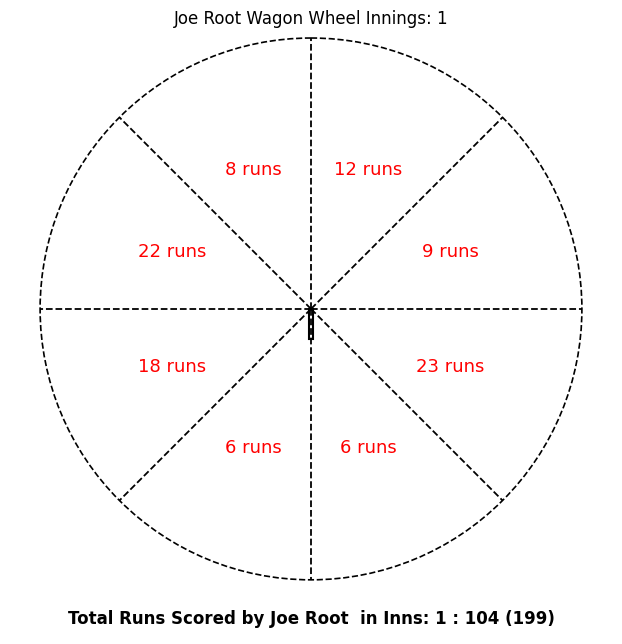

In [ ]:
test_match_wagon(df, 'Joe Root', 1)

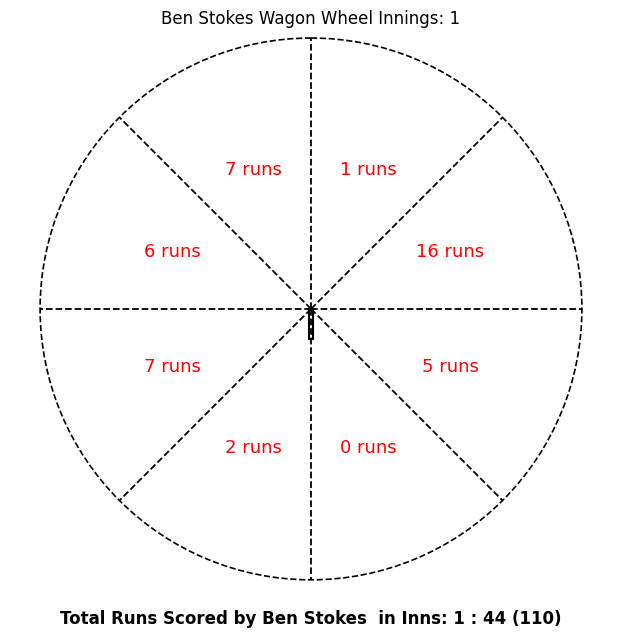

In [ ]:
test_match_wagon(df, 'Ben Stokes', 1)

# updated and correct wagon wheel zone with filters

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib.patches import Wedge  # add this at the top if not already


In [ ]:
def test_match_wagon(df, player_name, inns, bowler_name=None, run_values=None,transparent=False):
    # Filter by match, player, and innings
    local_df = df[
        (df['batsmanName'] == player_name) &
        (df['inningNumber'] == inns)
    ].copy()

    # Apply optional bowler filter
    if bowler_name:
        local_df = local_df[local_df['bowlerName'] == bowler_name]

    # Set score = 0 for extras without modifying original df
    # extras = ['wide', 'bye', 'leg bye']
    # local_df.loc[local_df['outcome'].str.lower().isin(extras), 'teamRuns'] = 0

    # playing_team = local_df['team_bat'].iloc[0] if not local_df.empty else "Unknown"
    # opponent_team = local_df['team_bowl'].iloc[0] if not local_df.empty else "Unknown"


    if run_values is not None:
        local_df = local_df[local_df['batsmanRuns'].isin(run_values)]
    
    # # Filter valid shot points
    # balls_faced_df = local_df[
    #     (local_df['batsmanName'] == player_name) & (local_df['wides'] == 0)
    # ][['batsmanName', 'wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()
    # Full innings (unfiltered) balls for shot control calc
    full_balls_df = df[
        (df['batsmanName'] == player_name) &
        (df['inningNumber'] == inns) &
        (df['wides'] == 0)
    ]

    # Full innings valid shot data (unfiltered) for productive shot calc
    all_shots_data = df[
        (df['batsmanName'] == player_name) &
        (df['inningNumber'] == inns) &
        ~((df['wagonX'] == 0) & (df['wagonY'] == 0))
    ][['wagonX', 'wagonY', 'teamRuns', 'batsmanRuns', 'isFour', 'isSix', 'shotControl', 'shotType']].dropna()

    # This is filtered shot data based on selected run values (for plotting only)
    balls_faced_df = local_df[
        (local_df['batsmanName'] == player_name) & (local_df['wides'] == 0)
    ][['batsmanName', 'wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()


    player_data = local_df[
        ~((local_df['wagonX'] == 0) & (local_df['wagonY'] == 0))
    ][['wagonX', 'wagonY', 'teamRuns', 'batsmanRuns', 'isFour', 'isSix', 'shotControl', 'shotType']].dropna()

    if player_data.empty:
        print(f"No data found for {player_name} in this match, and in innings {inns}")
        return

    # Color map
    score_colors = {
        0: '#A9A9A9',
        1: '#00C853',
        2: '#2979FF',
        3: '#FF9100',
        4: '#D50000',
        6: '#AA00FF'
    }
    # player_data['color'] = player_data['score'].map(score_colors).fillna('black')
    player_data['color'] = player_data['batsmanRuns'].map(score_colors).fillna('black')

    # Additional stats
    total_4s = int(player_data['isFour'].sum())
    total_6s = int(player_data['isSix'].sum())
    # control_pct = round((local_df[(local_df['wides'] == 0) & (local_df['shotControl'] == 0)].shape[0]) / balls_faced_df.shape[0] * 100, 2)
    control_pct = round(
        (full_balls_df[full_balls_df['shotControl'] == 0].shape[0]) / full_balls_df.shape[0] * 100, 2
    )

    # Most productive shot
    # if 'shotType' in player_data.columns and not player_data.empty:
    if 'shotType' in all_shots_data.columns and not all_shots_data.empty:
        shot_summary = all_shots_data.groupby('shotType').agg({
        # shot_summary = player_data.groupby('shotType').agg({
            'batsmanRuns': 'sum',
            'isFour': 'sum',
            'isSix': 'sum'
        }).sort_values(by='batsmanRuns', ascending=False)

        if not shot_summary.empty:
            top_shot = shot_summary.iloc[0]
            top_shot_type = shot_summary.index[0]
            most_prod_shot_text = (
                f"{top_shot_type}: {int(top_shot['batsmanRuns'])} runs, "
                f"{int(top_shot['isFour'])}x4s, {int(top_shot['isSix'])}x6s"
            )
        else:
            most_prod_shot_text = "No productive shot data"
    else:
        most_prod_shot_text = "No shot type data"

    # Plot setup
    # fig, ax = plt.subplots(figsize=(7, 7))
    # ax.set_facecolor("white")
    fig, ax = plt.subplots(figsize=(7, 7), facecolor='none' if transparent else 'white')
    ax.set_facecolor('none' if transparent else 'white')
    center_x, center_y = 180, 164

    # Boundary
    boundary = plt.Circle((center_x, center_y), 180, color='black',
                          fill=False, linestyle='-', linewidth=1.2)
    ax.add_artist(boundary)

    # Pitch
    pitch_length = 20.12
    pitch_width = 3
    pitch = plt.Rectangle((center_x - pitch_width / 2, center_y),
                          pitch_width, pitch_length,
                          edgecolor='black', facecolor='none', linewidth=1.5)
    ax.add_artist(pitch)

    # Quadrants
    for angle in range(0, 360, 45):
        rad = np.deg2rad(angle)
        x_end = center_x + 180 * np.cos(rad)
        y_end = center_y + 180 * np.sin(rad)
        ax.plot([center_x, x_end], [center_y, y_end], color='black', linestyle='-', linewidth=1.3)

    def get_quadrant(x, y):
        angle = np.arctan2(y - center_y, x - center_x)
        degree = (np.degrees(angle) + 360) % 360
        return int(degree // 45)

    player_data['quadrant'] = player_data.apply(
        lambda row: get_quadrant(row['wagonX'], row['wagonY']), axis=1
    )

    # Quadrant scores
    quadrant_totals = [0] * 8
    total_score = 0
    for q in range(8):
        q_score = player_data[player_data['quadrant'] == q]['batsmanRuns'].sum()
        quadrant_totals[q] = q_score
        total_score += q_score

    # print("Quadrant Totals:", quadrant_totals)
    # top_quadrants = sorted(range(8), key=lambda i: quadrant_totals[i], reverse=True)[:2]
    # print("Top Quadrants:", top_quadrants)  # Debug

    # Highlight top 2 quadrants using Wedge from matplotlib.patches
    top_quadrants = sorted(range(8), key=lambda i: quadrant_totals[i], reverse=True)[:2]
    # rank_color = {top_quadrants[0]: 1.0, top_quadrants[1]: 0.7}
    rank_color = {top_quadrants[i]: 1.0 - i * 0.3 for i in range(len(top_quadrants))}
    cmap = cm.get_cmap('Blues')  # or any other you prefer

    for i in range(8):
        theta1 = i * 45
        theta2 = theta1 + 45

        # if i in top_quadrants:
        #     wedge = Wedge(center=(center_x, center_y),
        #                 r=180,
        #                 theta1=theta1,
        #                 theta2=theta2,
        #                 color=cmap(rank_color[i]),
        #                 # color=cmap(i / 7),
        #                 alpha=0.3,
        #                 zorder=0)
        #     ax.add_patch(wedge)
        if i in rank_color:
            wedge = Wedge(center=(center_x, center_y),
                        r=180,
                        theta1=theta1,
                        theta2=theta2,
                        color=cmap(rank_color[i]),
                        # color=cmap(i / 7),
                        alpha=0.3,
                        zorder=0)
            ax.add_patch(wedge)

        # Label coordinates
        mid_angle = np.deg2rad(theta1 + 22.5)
        label_x = center_x + 100 * np.cos(mid_angle)
        label_y = center_y + 100 * np.sin(mid_angle)
        label_color = 'darkred' if i in top_quadrants else 'red'
        ax.text(label_x, label_y, f"{quadrant_totals[i]} runs", fontsize=13, color=label_color,
                ha='center', va='center')

    # # Highlight top 2 quadrants
    # top_quadrants = sorted(range(8), key=lambda i: quadrant_totals[i], reverse=True)[:2]
    # # colors = 
    # colors = cm.get_cmap('GnBu', 8)

    # for i in range(8):
    #     mid_angle = np.deg2rad(i * 45 + 22.5)
    #     label_x = center_x + 100 * np.cos(mid_angle)
    #     label_y = center_y + 100 * np.sin(mid_angle)

    #     label_color = 'red'
    #     if i in top_quadrants:
    #         wedge = plt.Circle((center_x, center_y), 180, color=colors(i / 7), alpha=0.25, zorder=0)
    #         theta1 = i * 45
    #         theta2 = theta1 + 45
    #         # ax.add_patch(plt.Wedge((center_x, center_y), 180, theta1, theta2, color=colors(i / 7), alpha=0.25))
    #         ax.add_patch(Wedge((center_x, center_y), 180, theta1, theta2, color=colors(i / 7), alpha=0.25))
    #         label_color = 'darkred'

    #     ax.text(label_x, label_y, f"{quadrant_totals[i]} runs", fontsize=13, color=label_color,
    #             ha='center', va='center')

    # Layout
    ax.set_xlim(-20, 380)
    ax.set_ylim(-20, 410)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal', adjustable='box')

    ax.set_title(f"{player_name} Wagon Wheel Innings: {inns}", fontsize=12)

    # ax.text(180, 360, f"Total Runs: {total_score} ({balls_faced_df.shape[0]} balls)",
    #         fontsize=11, ha='center', fontweight='bold', color='black')
    # ax.text(180, 375, f"4s: {total_4s} | 6s: {total_6s} | Shot Control: {control_pct}%",
    #         fontsize=11, ha='center', color='darkgreen')
    # ax.text(180, 390, f"Most Productive Shot: {most_prod_shot_text}",
    #         fontsize=11, ha='center', color='navy')
    ax.text(180, 360, f"Total Runs: {total_score} ({balls_faced_df.shape[0]} balls)",
            fontsize=11, ha='center', fontweight='bold')
    ax.text(180, 375, f"4s: {total_4s} | 6s: {total_6s}",
            fontsize=11, ha='center', color='darkgreen')
    ax.text(180, 390, f"Shot Control: {control_pct}%",
            fontsize=11, ha='center', color='purple')
    ax.text(180, 405, f"Most Productive Shot: {most_prod_shot_text}",
            fontsize=11, ha='center', color='navy')

    ax.invert_yaxis()
    ax.set_axis_off()

    # Legend
    # legend_elements = [
    #     mpatches.Patch(color=color, label=f'{score} run' + ('s' if score != 1 else ''))
    #     for score, color in score_colors.items()
    # ]
    # ax.legend(handles=legend_elements, loc='upper right', fontsize=8)

    plt.subplots_adjust(left=0.05, right=0.95, top=0.93, bottom=0.07)
    plt.show()


C:\Users\INSPIRE COMP\AppData\Local\Temp\ipykernel_4852\2713738362.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues')  # or any other you prefer


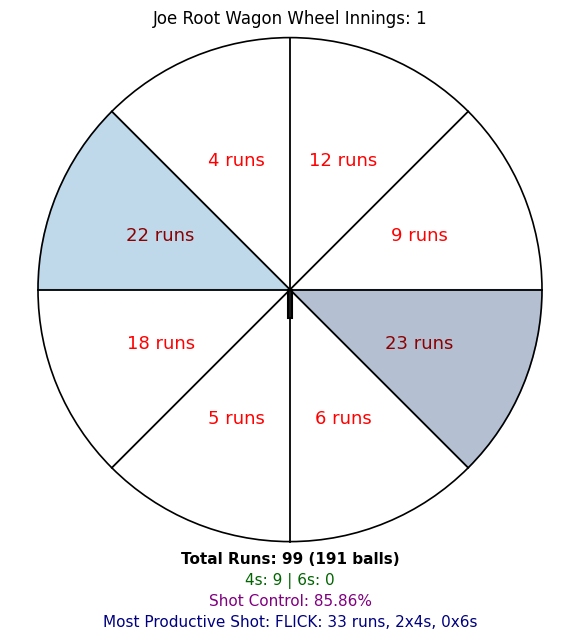

In [80]:
# test_match_wagon(df, 'Joe Root', 1, None, [0, 1, 2, 3, 4, 6])
test_match_wagon(test, 'Joe Root', 1, None,None,False)

# with other filters to show the text elements or not

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib.patches import Wedge  # add this at the top if not already
from io import BytesIO

# def test_match_wagon(df, player_name, inns, bowler_name=None, run_values=None,transparent=False):
def test_match_wagon(
    df, player_name, inns, test_num = None,bowler_name=None, run_values=None, transparent=False,
    show_title=True, show_total=True,
    show_fours_sixes=True, show_control=True, show_prod_shot=True
):
    # Filter by match, player, and innings
    # local_df = df[
    #     (df['batsmanName'] == player_name) &
    #     (df['inningNumber'] == inns)
    # ].copy()
    local_df = df[
        (df['batsmanName'] == player_name)
    ].copy()

    local_df = local_df[local_df['TestNum'] == test_num]

    local_df = local_df[local_df['inningNumber'] == inns]

    # Apply optional bowler filter
    if bowler_name:
        local_df = local_df[local_df['bowlerName'] == bowler_name]

    # Set score = 0 for extras without modifying original df
    # extras = ['wide', 'bye', 'leg bye']
    # local_df.loc[local_df['outcome'].str.lower().isin(extras), 'teamRuns'] = 0

    # playing_team = local_df['team_bat'].iloc[0] if not local_df.empty else "Unknown"
    # opponent_team = local_df['team_bowl'].iloc[0] if not local_df.empty else "Unknown"

    if run_values is not None:
        local_df = local_df[local_df['batsmanRuns'].isin(run_values)]

    # Filter valid shot points
    # balls_faced_df = local_df[
    #     (local_df['batsmanName'] == player_name) & (local_df['wides'] == 0)
    # ][['batsmanName', 'wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()

    # Full innings (unfiltered) balls for shot control calc
    full_balls_df = df[
        (df['batsmanName'] == player_name) &
        (df['inningNumber'] == inns) &
        (df['wides'] == 0)
    ]
    team_bats = local_df['team_bat'].unique()[0]
    if team_bats == 'IND':
        team_bowl = 'ENG'
    elif team_bats == 'ENG':
        team_bowl = 'IND'
    # Full innings valid shot data (unfiltered) for productive shot calc
    all_shots_data = df[
        (df['batsmanName'] == player_name) &
        (df['inningNumber'] == inns) &

        ~((df['wagonX'] == 0) & (df['wagonY'] == 0))
    ][['wagonX', 'wagonY', 'teamRuns', 'batsmanRuns', 'isFour', 'isSix', 'shotControl', 'shotType']].dropna()

    # This is filtered shot data based on selected run values (for plotting only)
    balls_faced_df = local_df[
        (local_df['batsmanName'] == player_name) & (local_df['wides'] == 0)
    ][['batsmanName', 'wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()



    player_data = local_df[
        ~((local_df['wagonX'] == 0) & (local_df['wagonY'] == 0))
    ][['wagonX', 'wagonY', 'teamRuns', 'batsmanRuns', 'isFour', 'isSix', 'shotControl', 'shotType']].dropna()

    if player_data.empty:
        print(f"No data found for {player_name} in this match, and in innings {inns}")
        return

    # Color map
    score_colors = {
        0: '#A9A9A9',
        1: '#00C853',
        2: '#2979FF',
        3: '#FF9100',
        4: '#D50000',
        6: '#AA00FF'
    }
    # player_data['color'] = player_data['score'].map(score_colors).fillna('black')
    player_data['color'] = player_data['batsmanRuns'].map(score_colors).fillna('black')

    # Additional stats
    total_4s = int(player_data['isFour'].sum())
    total_6s = int(player_data['isSix'].sum())
    # control_pct = round((local_df[(local_df['wides'] == 0) & (local_df['shotControl'] == 0)].shape[0]) / balls_faced_df.shape[0] * 100, 2)
    control_pct = round(
        # (full_balls_df[full_balls_df['shotControl'] == 0].shape[0]) / full_balls_df.shape[0] * 100, 2
        (full_balls_df[full_balls_df['shotControl'] == 1].shape[0]) / full_balls_df.shape[0] * 100, 2
    )

    # Most productive shot
    if 'shotType' in all_shots_data.columns and not all_shots_data.empty:
        shot_summary = all_shots_data.groupby('shotType').agg({
    # if 'shotType' in player_data.columns and not player_data.empty:
    #     shot_summary = player_data.groupby('shotType').agg({
            'batsmanRuns': 'sum',
            'isFour': 'sum',
            'isSix': 'sum'
        }).sort_values(by='batsmanRuns', ascending=False)

        if not shot_summary.empty:
            top_shot = shot_summary.iloc[0]
            top_shot_type = shot_summary.index[0]
            most_prod_shot_text = (
                f"{top_shot_type}: {int(top_shot['batsmanRuns'])} runs, "
                f"{int(top_shot['isFour'])}x4s, {int(top_shot['isSix'])}x6s"
            )
        else:
            most_prod_shot_text = "No productive shot data"
    else:
        most_prod_shot_text = "No shot type data"

    # Plot setup
    # fig, ax = plt.subplots(figsize=(7, 7))
    # ax.set_facecolor("white")
    fig, ax = plt.subplots(figsize=(7, 7), facecolor='none' if transparent else 'white')
    ax.set_facecolor('none' if transparent else 'white')
    center_x, center_y = 180, 164

    # Boundary
    boundary = plt.Circle((center_x, center_y), 180, color='black',
                          fill=False, linestyle='-', linewidth=1.2)
    ax.add_artist(boundary)

    # Pitch
    pitch_length = 20.12
    pitch_width = 3
    pitch = plt.Rectangle((center_x - pitch_width / 2, center_y),
                          pitch_width, pitch_length,
                          edgecolor='black', facecolor='none', linewidth=1.5)
    ax.add_artist(pitch)

    # Quadrants
    for angle in range(0, 360, 45):
        rad = np.deg2rad(angle)
        x_end = center_x + 180 * np.cos(rad)
        y_end = center_y + 180 * np.sin(rad)
        ax.plot([center_x, x_end], [center_y, y_end], color='black', linestyle='-', linewidth=1.3)

    def get_quadrant(x, y):
        angle = np.arctan2(y - center_y, x - center_x)
        degree = (np.degrees(angle) + 360) % 360
        return int(degree // 45)

    player_data['quadrant'] = player_data.apply(
        lambda row: get_quadrant(row['wagonX'], row['wagonY']), axis=1
    )

    # Quadrant scores
    quadrant_totals = [0] * 8
    total_score = 0
    for q in range(8):
        q_score = player_data[player_data['quadrant'] == q]['batsmanRuns'].sum()
        quadrant_totals[q] = q_score
        total_score += q_score

    # print("Quadrant Totals:", quadrant_totals)
    # top_quadrants = sorted(range(8), key=lambda i: quadrant_totals[i], reverse=True)[:2]
    # print("Top Quadrants:", top_quadrants)  # Debug

    # Highlight top 2 quadrants using Wedge from matplotlib.patches
    top_quadrants = sorted(range(8), key=lambda i: quadrant_totals[i], reverse=True)[:2]
    # rank_color = {top_quadrants[0]: 1.0, top_quadrants[1]: 0.7}
    rank_color = {top_quadrants[i]: 1.0 - i * 0.3 for i in range(len(top_quadrants))}
    cmap = cm.get_cmap('Blues')  # or any other you prefer

    for i in range(8):
        theta1 = i * 45
        theta2 = theta1 + 45

        # if i in top_quadrants:
        #     wedge = Wedge(center=(center_x, center_y),
        #                 r=180,
        #                 theta1=theta1,
        #                 theta2=theta2,
        #                 color=cmap(rank_color[i]),
        #                 # color=cmap(i / 7),
        #                 alpha=0.3,
        #                 zorder=0)
        #     ax.add_patch(wedge)
        if i in rank_color:
            wedge = Wedge(center=(center_x, center_y),
                        r=180,
                        theta1=theta1,
                        theta2=theta2,
                        color=cmap(rank_color[i]),
                        # color=cmap(i / 7),
                        alpha=0.3,
                        zorder=0)
            ax.add_patch(wedge)

        # Label coordinates
        mid_angle = np.deg2rad(theta1 + 22.5)
        label_x = center_x + 100 * np.cos(mid_angle)
        label_y = center_y + 100 * np.sin(mid_angle)
        label_color = 'darkred' if i in top_quadrants else 'red'
        ax.text(label_x, label_y, f"{quadrant_totals[i]} runs", fontsize=13, color=label_color,
                ha='center', va='center')

    # # Highlight top 2 quadrants
    # top_quadrants = sorted(range(8), key=lambda i: quadrant_totals[i], reverse=True)[:2]
    # # colors = 
    # colors = cm.get_cmap('GnBu', 8)

    # for i in range(8):
    #     mid_angle = np.deg2rad(i * 45 + 22.5)
    #     label_x = center_x + 100 * np.cos(mid_angle)
    #     label_y = center_y + 100 * np.sin(mid_angle)

    #     label_color = 'red'
    #     if i in top_quadrants:
    #         wedge = plt.Circle((center_x, center_y), 180, color=colors(i / 7), alpha=0.25, zorder=0)
    #         theta1 = i * 45
    #         theta2 = theta1 + 45
    #         # ax.add_patch(plt.Wedge((center_x, center_y), 180, theta1, theta2, color=colors(i / 7), alpha=0.25))
    #         ax.add_patch(Wedge((center_x, center_y), 180, theta1, theta2, color=colors(i / 7), alpha=0.25))
    #         label_color = 'darkred'

    #     ax.text(label_x, label_y, f"{quadrant_totals[i]} runs", fontsize=13, color=label_color,
    #             ha='center', va='center')

    # Layout
    ax.set_xlim(-20, 380)
    ax.set_ylim(-20, 410)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal', adjustable='box')

    # ax.set_title(f"{player_name} Wagon Wheel Innings: {inns}", fontsize=12)
    if show_title:   
        # ax.set_title(f"{player_name} Wagon Wheel Innings: {inns}", fontsize=12)
        ax.set_title(f"{player_name} vs {team_bowl} - Test {test_num}, Inns: {inns}".upper(), fontsize=12, fontweight='bold',fontfamily='Segoe UI')

    # ax.text(180, 360, f"Total Runs: {total_score} ({balls_faced_df.shape[0]} balls)",
    #         fontsize=11, ha='center', fontweight='bold', color='black')
    # ax.text(180, 375, f"4s: {total_4s} | 6s: {total_6s} | Shot Control: {control_pct}%",
    #         fontsize=11, ha='center', color='darkgreen')
    # ax.text(180, 390, f"Most Productive Shot: {most_prod_shot_text}",
    #         fontsize=11, ha='center', color='navy')
    if show_total:
        ax.text(180, 360, f"Total Runs: {total_score} ({balls_faced_df.shape[0]} balls)",
                fontsize=11, ha='center', fontweight='bold')
    if show_fours_sixes:  
        ax.text(180, 375, f"4s: {total_4s} | 6s: {total_6s}",
                fontsize=11, ha='center', color='darkgreen')
    if show_control:
        ax.text(180, 390, f"Control: {control_pct}%",
                fontsize=11, ha='center', color='purple')
    if show_prod_shot:
        ax.text(180, 405, f"Most Productive Shot: {most_prod_shot_text}",
                fontsize=11, ha='center', color='navy')

    ax.invert_yaxis()
    ax.set_axis_off()

    # Legend
    # legend_elements = [
    #     mpatches.Patch(color=color, label=f'{score} run' + ('s' if score != 1 else ''))
    #     for score, color in score_colors.items()
    # ]
    # ax.legend(handles=legend_elements, loc='upper right', fontsize=8)

    plt.subplots_adjust(left=0.05, right=0.95, top=0.93, bottom=0.07)
    plt.close(fig)
    return fig
    # plt.show()

# finalised and updated on app

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib.patches import Wedge  # add this at the top if not already
from io import BytesIO



# def test_match_wagon(df, player_name, inns, bowler_name=None, run_values=None,transparent=False):
def test_match_wagon(
    df, player_name, inns, test_num=None,bowler_name=None, run_values=None, transparent=False,
    show_title=True, show_summary=True,
    show_fours_sixes=True, show_control=True, show_prod_shot=True, runs_count=True
):
    
    # Filter by match, player, and innings
    # local_df = df[
    #     (df['batsmanName'] == player_name) &
    #     (df['inningNumber'] == inns)
    # ].copy()
    local_df = df[
        (df['batsmanName'] == player_name)
    ].copy()

    local_df = local_df[local_df['TestNum'] == test_num]

    local_df = local_df[local_df['inningNumber'] == inns]

    # === Total Innings Summary ===
    innings_valid_balls = local_df[local_df['wides'] == 0]
    innings_runs = innings_valid_balls['batsmanRuns'].sum()
    innings_balls = innings_valid_balls.shape[0]
    innings_4s = innings_valid_balls['isFour'].sum()
    innings_6s = innings_valid_balls['isSix'].sum()
    # Apply optional bowler filter
    if bowler_name:
        local_df = local_df[local_df['bowlerName'] == bowler_name]

    # Set score = 0 for extras without modifying original df
    # extras = ['wide', 'bye', 'leg bye']
    # local_df.loc[local_df['outcome'].str.lower().isin(extras), 'teamRuns'] = 0

    # playing_team = local_df['team_bat'].iloc[0] if not local_df.empty else "Unknown"
    # opponent_team = local_df['team_bowl'].iloc[0] if not local_df.empty else "Unknown"

    if run_values is not None:
        local_df = local_df[local_df['batsmanRuns'].isin(run_values)]

    # Filter valid shot points
    # balls_faced_df = local_df[
    #     (local_df['batsmanName'] == player_name) & (local_df['wides'] == 0)
    # ][['batsmanName', 'wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()
    # we have to calculate the team_bowl, by seeing the batsman_name and team_bats, the bowling team is the opposite of batting team
    team_bats = local_df['team_bat'].unique()[0]
    if team_bats == 'IND':
        team_bowl = 'ENG'
    elif team_bats == 'ENG':
        team_bowl = 'IND'
    # Full innings (unfiltered) balls for shot control calc
    full_balls_df = df[
        (df['batsmanName'] == player_name) &
        (df['inningNumber'] == inns) &
        (df['TestNum'] == test_num) &
        (df['wides'] == 0)
    ]

    # Full innings valid shot data (unfiltered) for productive shot calc
    all_shots_data = df[
        (df['batsmanName'] == player_name) &
        (df['inningNumber'] == inns) &
        (df['TestNum'] == test_num) &
        ~((df['wagonX'] == 0) & (df['wagonY'] == 0))
    ][['wagonX', 'wagonY', 'teamRuns', 'batsmanRuns', 'isFour', 'isSix', 'shotControl', 'shotType']].dropna()

    # This is filtered shot data based on selected run values (for plotting only)
    balls_faced_df = local_df[
        (local_df['batsmanName'] == player_name) & (local_df['wides'] == 0)
    ][['batsmanName', 'wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()



    player_data = local_df[
        ~((local_df['wagonX'] == 0) & (local_df['wagonY'] == 0))
    ][['wagonX', 'wagonY', 'teamRuns', 'batsmanRuns', 'isFour', 'isSix', 'shotControl', 'shotType']].dropna()

    if player_data.empty:
        print(f"No data found for {player_name} in this match, and in innings {inns}")
        return
    # if player_data.empty:
    #     player_data_sorted = pd.DataFrame()  # Set to empty for drawing logic below
    # else:
    #     player_data_sorted = player_data.sort_values(by='batsmanRuns')
    #     player_data['color'] = player_data['batsmanRuns'].map(score_colors).fillna('black')

    # Color map
    score_colors = {
        0: '#A9A9A9',
        1: '#00C853',
        2: '#2979FF',
        3: '#FF9100',
        4: '#D50000',
        6: '#AA00FF'
    }
    # player_data['color'] = player_data['score'].map(score_colors).fillna('black')
    # player_data['color'] = player_data['batsmanRuns'].map(score_colors).fillna('black')
    if not player_data.empty:
        player_data['color'] = player_data['batsmanRuns'].map(score_colors).fillna('black')
    else:
        player_data['color'] = pd.Series(dtype='str')

    # Additional stats
    total_4s = int(player_data['isFour'].sum())
    total_6s = int(player_data['isSix'].sum())
    # control_pct = round((local_df[(local_df['wides'] == 0) & (local_df['shotControl'] == 0)].shape[0]) / balls_faced_df.shape[0] * 100, 2)
    control_pct = round(
        (full_balls_df[full_balls_df['shotControl'] == 1].shape[0]) / full_balls_df.shape[0] * 100, 2
    )

    # Most productive shot
    if 'shotType' in all_shots_data.columns and not all_shots_data.empty:
        shot_summary = all_shots_data.groupby('shotType').agg({
    # if 'shotType' in player_data.columns and not player_data.empty:
    #     shot_summary = player_data.groupby('shotType').agg({
            'batsmanRuns': 'sum',
            'isFour': 'sum',
            'isSix': 'sum'
        }).sort_values(by='batsmanRuns', ascending=False)

        if not shot_summary.empty:
            top_shot = shot_summary.iloc[0]
            top_shot_type = shot_summary.index[0]
            most_prod_shot_text = (
                f"{top_shot_type}: {int(top_shot['batsmanRuns'])} runs,\n"
                f"4s: {int(top_shot['isFour'])}, 6s: {int(top_shot['isSix'])}"
            )
        else:
            most_prod_shot_text = "No productive shot data"
    else:
        most_prod_shot_text = "No shot type data"

    # Plot setup
    # fig, ax = plt.subplots(figsize=(7, 7))
    # ax.set_facecolor("white")
    fig, ax = plt.subplots(figsize=(7, 7), facecolor='none' if transparent else 'white')
    ax.set_facecolor('none' if transparent else 'white')
    center_x, center_y = 180, 164

    # Boundary
    boundary = plt.Circle((center_x, center_y), 180, color='black',
                          fill=False, linestyle='-', linewidth=1.2)
    ax.add_artist(boundary)

    # Pitch
    # pitch_length = 20.12
    # pitch_width = 3
    # pitch = plt.Rectangle((center_x - pitch_width / 2, center_y),
    #                       pitch_width, pitch_length,
    #                       edgecolor='black', facecolor='none', linewidth=1.5)
    # ax.add_artist(pitch)
    batter_dot = plt.Circle((center_x, center_y), radius=3, edgecolor='black', facecolor='green', linewidth=1, zorder=2)
    ax.add_artist(batter_dot)

    # Quadrants
    for angle in range(0, 360, 45):
        rad = np.deg2rad(angle)
        x_end = center_x + 180 * np.cos(rad)
        y_end = center_y + 180 * np.sin(rad)
        ax.plot([center_x, x_end], [center_y, y_end], color='black', linestyle='-', linewidth=1.3)

    def get_quadrant(x, y):
        angle = np.arctan2(y - center_y, x - center_x)
        degree = (np.degrees(angle) + 360) % 360
        return int(degree // 45)

    player_data['quadrant'] = player_data.apply(
        lambda row: get_quadrant(row['wagonX'], row['wagonY']), axis=1
    )

    # Quadrant scores
    quadrant_totals = [0] * 8
    total_score = 0
    for q in range(8):
        q_score = player_data[player_data['quadrant'] == q]['batsmanRuns'].sum()
        quadrant_totals[q] = q_score
        total_score += q_score

    # print("Quadrant Totals:", quadrant_totals)
    # top_quadrants = sorted(range(8), key=lambda i: quadrant_totals[i], reverse=True)[:2]
    # print("Top Quadrants:", top_quadrants)  # Debug

    # Highlight top 2 quadrants using Wedge from matplotlib.patches
    top_quadrants = sorted(range(8), key=lambda i: quadrant_totals[i], reverse=True)[:2]
    # rank_color = {top_quadrants[0]: 1.0, top_quadrants[1]: 0.7}
    rank_color = {top_quadrants[i]: 1.0 - i * 0.3 for i in range(len(top_quadrants))}
    cmap = cm.get_cmap('Blues')  # or any other you prefer

    for i in range(8):
        theta1 = i * 45
        theta2 = theta1 + 45

        # if i in top_quadrants:
        #     wedge = Wedge(center=(center_x, center_y),
        #                 r=180,
        #                 theta1=theta1,
        #                 theta2=theta2,
        #                 color=cmap(rank_color[i]),
        #                 # color=cmap(i / 7),
        #                 alpha=0.3,
        #                 zorder=0)
        #     ax.add_patch(wedge)
        if i in rank_color:
            wedge = Wedge(center=(center_x, center_y),
                        r=180,
                        theta1=theta1,
                        theta2=theta2,
                        color=cmap(rank_color[i]),
                        # color=cmap(i / 7),
                        alpha=0.3,
                        zorder=0)
            ax.add_patch(wedge)

        # Label coordinates
        mid_angle = np.deg2rad(theta1 + 22.5)
        label_x = center_x + 100 * np.cos(mid_angle)
        label_y = center_y + 100 * np.sin(mid_angle)
        label_color = 'darkred' if i in top_quadrants else 'red'
        ax.text(label_x, label_y, f"{quadrant_totals[i]} runs", fontsize=13, color=label_color,
                ha='center', va='center')

    # # Highlight top 2 quadrants
    # top_quadrants = sorted(range(8), key=lambda i: quadrant_totals[i], reverse=True)[:2]
    # # colors = 
    # colors = cm.get_cmap('GnBu', 8)

    # for i in range(8):
    #     mid_angle = np.deg2rad(i * 45 + 22.5)
    #     label_x = center_x + 100 * np.cos(mid_angle)
    #     label_y = center_y + 100 * np.sin(mid_angle)

    #     label_color = 'red'
    #     if i in top_quadrants:
    #         wedge = plt.Circle((center_x, center_y), 180, color=colors(i / 7), alpha=0.25, zorder=0)
    #         theta1 = i * 45
    #         theta2 = theta1 + 45
    #         # ax.add_patch(plt.Wedge((center_x, center_y), 180, theta1, theta2, color=colors(i / 7), alpha=0.25))
    #         ax.add_patch(Wedge((center_x, center_y), 180, theta1, theta2, color=colors(i / 7), alpha=0.25))
    #         label_color = 'darkred'

    #     ax.text(label_x, label_y, f"{quadrant_totals[i]} runs", fontsize=13, color=label_color,
    #             ha='center', va='center')

    # Layout
    ax.set_xlim(-20, 380)
    ax.set_ylim(-50, 420)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal', adjustable='box')

    # ax.set_title(f"{player_name} Wagon Wheel Innings: {inns}", fontsize=12)
    # if show_title:   
    #     ax.set_title(f"{player_name} Wagon Wheel Innings: {inns}", fontsize=12)
    if show_title:
        ax.set_title(f"{player_name} vs {team_bowl} - Test {test_num}, Inns: {inns}".upper(), fontsize=12, fontweight='bold',fontfamily='Segoe UI')


    if show_summary:
        ax.text(180, -40, f"Total Runs: {innings_runs} ({innings_balls} balls)",
                fontsize=11, ha='center', fontweight='bold', color='darkgreen')
        ax.text(180, -25, f"Total 4s: {innings_4s} | 6s: {innings_6s}",
                fontsize=11, ha='center', color='darkgreen')
    # ax.text(180, 360, f"Total Runs: {total_score} ({balls_faced_df.shape[0]} balls)",
    #         fontsize=11, ha='center', fontweight='bold', color='black')
    # ax.text(180, 375, f"4s: {total_4s} | 6s: {total_6s} | Shot Control: {control_pct}%",
    #         fontsize=11, ha='center', color='darkgreen')
    # ax.text(180, 390, f"Most Productive Shot: {most_prod_shot_text}",
    #         fontsize=11, ha='center', color='navy')
    if runs_count:
        ax.text(180, 375, f"{total_score} ({balls_faced_df.shape[0]} balls)",
                fontsize=11, ha='center', fontweight='bold')
    if show_fours_sixes:  
        ax.text(180, 388, f"4s: {total_4s} | 6s: {total_6s}",
                fontsize=11, ha='center', color='darkgreen')
    if show_control:
        ax.text(10, 330, f"Control: {control_pct}%",
                fontsize=12, ha='center', color='purple', fontweight='bold')
        
    if show_prod_shot:
        ax.text(10, 390, f"Productive Shot:\n{most_prod_shot_text}",
                fontsize=11, ha='center', color='navy',fontweight='bold')

    ax.invert_yaxis()
    ax.set_axis_off()

    # Legend
    # legend_elements = [
    #     mpatches.Patch(color=color, label=f'{score} run' + ('s' if score != 1 else ''))
    #     for score, color in score_colors.items()
    # ]
    # ax.legend(handles=legend_elements, loc='upper right', fontsize=8)

    plt.subplots_adjust(left=0.05, right=0.95, top=0.93, bottom=0.07)
    plt.close(fig)
    return fig
    # plt.show()

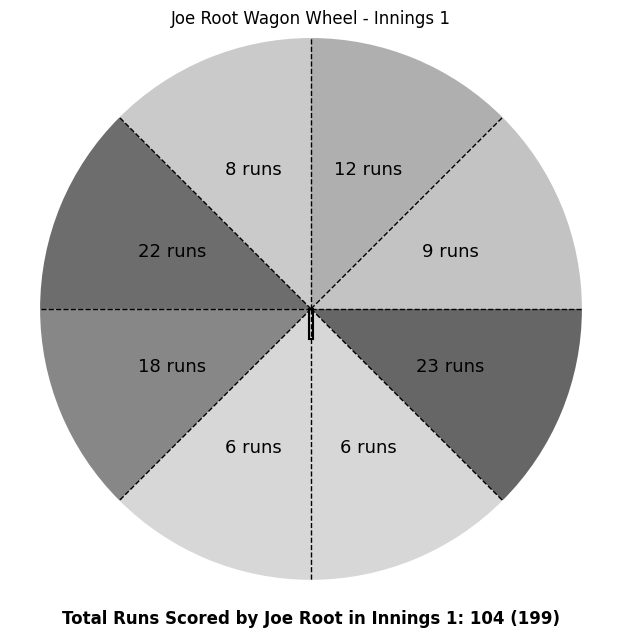

In [ ]:
test_match_wagon_colored(df, 'Joe Root', 1)

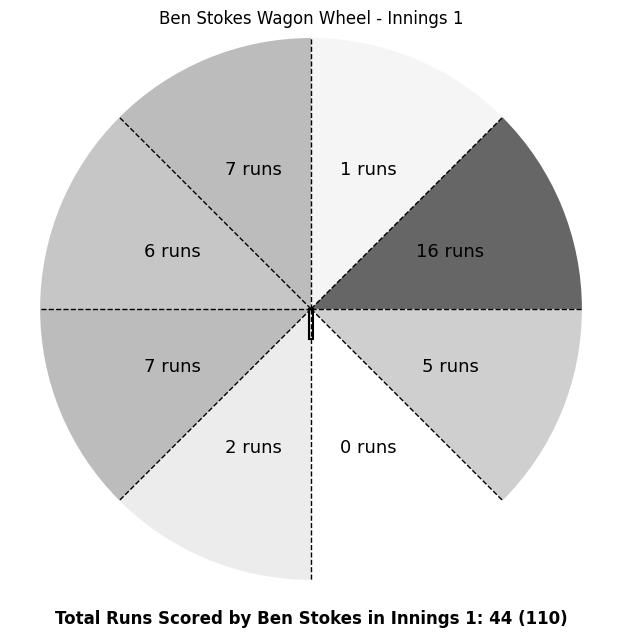

In [ ]:
test_match_wagon_colored(df, 'Ben Stokes', 1)

with bowler name filter

In [ ]:
def test_match_wagon_colored(df, player_name, inns, bowler_name=None):
    # Filter by player, innings, and optionally bowler
    local_df = df[
        (df['batsmanName'] == player_name) &
        (df['inningNumber'] == inns)
    ].copy()

    if bowler_name:
        local_df = local_df[local_df['bowlerName'] == bowler_name]

    balls_faced_df = local_df[
        (local_df['batsmanName'] == player_name) & (local_df['wides'] == 0)
    ][['batsmanName', 'wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()

    player_data = local_df[
        ~((local_df['wagonX'] == 0) & (local_df['wagonY'] == 0))
    ][['wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()

    if player_data.empty:
        if bowler_name:
            print(f"No data found for {player_name} vs {bowler_name} in innings {inns}")
        else:
            print(f"No data found for {player_name} in innings {inns}")
        return

    # Color map
    score_colors = {
        0: '#A9A9A9',
        1: '#00C853',
        2: '#2979FF',
        3: '#FF9100',
        4: '#D50000',
        6: '#AA00FF'
    }
    player_data['color'] = player_data['batsmanRuns'].map(score_colors).fillna('black')

    # Plot setup
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_facecolor("white")
    center_x, center_y = 180, 164
    boundary_radius = 180

    # Define quadrant based on angle
    def get_quadrant(x, y):
        angle = np.arctan2(y - center_y, x - center_x)
        degree = (np.degrees(angle) + 360) % 360
        return int(degree // 45)

    player_data['quadrant'] = player_data.apply(
        lambda row: get_quadrant(row['wagonX'], row['wagonY']), axis=1
    )

    # Compute quadrant scores
    quadrant_totals = [0] * 8
    total_score = 0
    for q in range(8):
        q_score = player_data[player_data['quadrant'] == q]['batsmanRuns'].sum()
        quadrant_totals[q] = q_score
        total_score += q_score

    max_score = max(quadrant_totals) if total_score > 0 else 1

    for i in range(8):
        angle_start = i * 45
        angle_end = (i + 1) * 45
        fraction = quadrant_totals[i] / max_score
        shade = 1 - (fraction * 0.6)
        wedge = mpatches.Wedge(
            center=(center_x, center_y),
            r=boundary_radius,
            theta1=angle_start,
            theta2=angle_end,
            facecolor=(shade, shade, shade),
            edgecolor='none'
        )
        ax.add_patch(wedge)

    for angle in range(0, 360, 45):
        rad = np.deg2rad(angle)
        x_end = center_x + 180 * np.cos(rad)
        y_end = center_y + 180 * np.sin(rad)
        ax.plot([center_x, x_end], [center_y, y_end],
                color='black', linestyle='--', linewidth=1)

    for i in range(8):
        mid_angle = np.deg2rad(i * 45 + 22.5)
        label_x = center_x + 100 * np.cos(mid_angle)
        label_y = center_y + 100 * np.sin(mid_angle)
        ax.text(label_x, label_y, f"{quadrant_totals[i]} runs",
                fontsize=13, color='black', ha='center', va='center')

    # Dynamic title
    title_text = f"{player_name} Wagon Wheel - Innings {inns}"
    if bowler_name:
        title_text += f" vs {bowler_name}"
    ax.set_title(title_text, fontsize=12)

    # Dynamic run annotation
    bottom_text = f"Total Runs Scored by {player_name} in Innings {inns}"
    if bowler_name:
        bottom_text += f" vs {bowler_name}"
    bottom_text += f": {total_score} ({balls_faced_df.shape[0]})"

    ax.text(180, 370, bottom_text,
            fontsize=12, ha='center', va='center', fontweight='bold', color='black')

    ax.set_xlim(-20, 380)
    ax.set_ylim(-20, 380)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_xticklabels([]), ax.set_yticklabels([])
    ax.invert_yaxis()
    ax.set_axis_off()

    plt.subplots_adjust(left=0.05, right=0.95, top=0.93, bottom=0.07)
    plt.close(fig)
    return fig


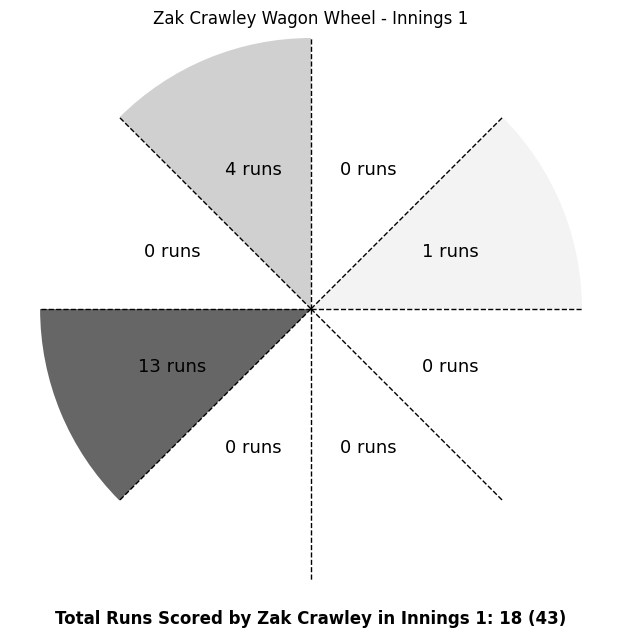

In [ ]:
test_match_wagon_colored(df,'Zak Crawley', 1, None)

**with bowler name and runs**

In [ ]:
def test_match_wagon_colored(df, player_name, inns, bowler_name=None, run_values=None):
    # Filter by player and innings
    local_df = df[
        (df['batsmanName'] == player_name) &
        (df['inningNumber'] == inns)
    ].copy()

    if bowler_name:
        local_df = local_df[local_df['bowlerName'] == bowler_name]

    if run_values is not None and len(run_values) > 0:
        local_df = local_df[local_df['batsmanRuns'].isin(run_values)]

    balls_faced_df = local_df[
        (local_df['batsmanName'] == player_name) & (local_df['wides'] == 0)
    ][['batsmanName', 'wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()

    player_data = local_df[
        ~((local_df['wagonX'] == 0) & (local_df['wagonY'] == 0))
    ][['wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()

    if player_data.empty:
        if bowler_name:
            print(f"No data found for {player_name} vs {bowler_name} in innings {inns}")
        else:
            print(f"No data found for {player_name} in innings {inns}")
        return

    # Color map
    score_colors = {
        0: '#A9A9A9',
        1: '#00C853',
        2: '#2979FF',
        3: '#FF9100',
        4: '#D50000',
        6: '#AA00FF'
    }
    player_data['color'] = player_data['batsmanRuns'].map(score_colors).fillna('black')

    # Plot setup
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_facecolor("white")
    center_x, center_y = 180, 164
    boundary_radius = 180

    def get_quadrant(x, y):
        angle = np.arctan2(y - center_y, x - center_x)
        degree = (np.degrees(angle) + 360) % 360
        return int(degree // 45)

    player_data['quadrant'] = player_data.apply(
        lambda row: get_quadrant(row['wagonX'], row['wagonY']), axis=1
    )

    quadrant_totals = [0] * 8
    total_score = 0
    for q in range(8):
        q_score = player_data[player_data['quadrant'] == q]['batsmanRuns'].sum()
        quadrant_totals[q] = q_score
        total_score += q_score

    max_score = max(quadrant_totals) if total_score > 0 else 1

    for i in range(8):
        angle_start = i * 45
        angle_end = (i + 1) * 45
        fraction = quadrant_totals[i] / max_score
        shade = 1 - (fraction * 0.6)
        wedge = mpatches.Wedge(
            center=(center_x, center_y),
            r=boundary_radius,
            theta1=angle_start,
            theta2=angle_end,
            facecolor=(shade, shade, shade),
            edgecolor='none'
        )
        ax.add_patch(wedge)

    for angle in range(0, 360, 45):
        rad = np.deg2rad(angle)
        x_end = center_x + 180 * np.cos(rad)
        y_end = center_y + 180 * np.sin(rad)
        ax.plot([center_x, x_end], [center_y, y_end], color='black', linestyle='--', linewidth=1)

    for i in range(8):
        mid_angle = np.deg2rad(i * 45 + 22.5)
        label_x = center_x + 100 * np.cos(mid_angle)
        label_y = center_y + 100 * np.sin(mid_angle)
        ax.text(label_x, label_y, f"{quadrant_totals[i]} runs", fontsize=13, color='black', ha='center', va='center')

    # Title & annotation
    title_text = f"{player_name} Wagon Wheel - Innings {inns}"
    if bowler_name:
        title_text += f" vs {bowler_name}"
    ax.set_title(title_text, fontsize=12)

    bottom_text = f"Total Runs Scored by {player_name} in Innings {inns}"
    if bowler_name:
        bottom_text += f" vs {bowler_name}"
    bottom_text += f": {total_score} ({balls_faced_df.shape[0]})"

    ax.text(180, 370, bottom_text, fontsize=12, ha='center', va='center', fontweight='bold', color='black')

    ax.set_xlim(-20, 380)
    ax.set_ylim(-20, 380)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_xticklabels([]), ax.set_yticklabels([])
    ax.invert_yaxis()
    ax.set_axis_off()

    plt.subplots_adjust(left=0.05, right=0.95, top=0.93, bottom=0.07)
    # plt.close(fig)
    # return fig
    plt.show()




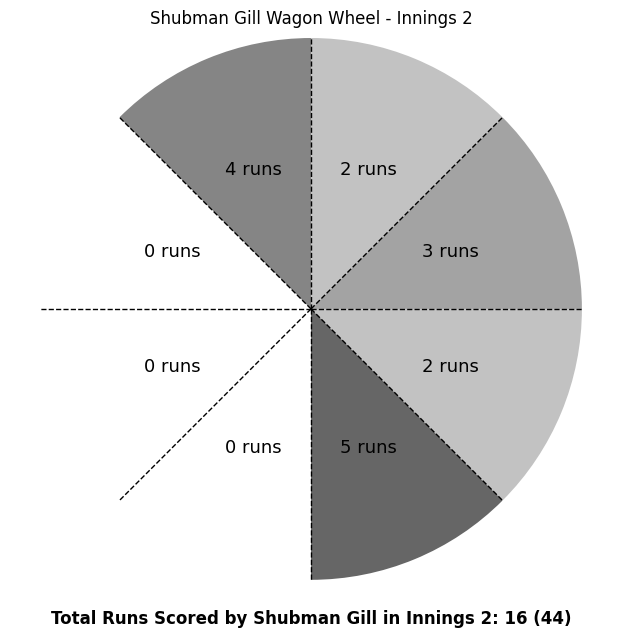

In [ ]:
test_match_wagon_colored(df, 'Shubman Gill', 2)

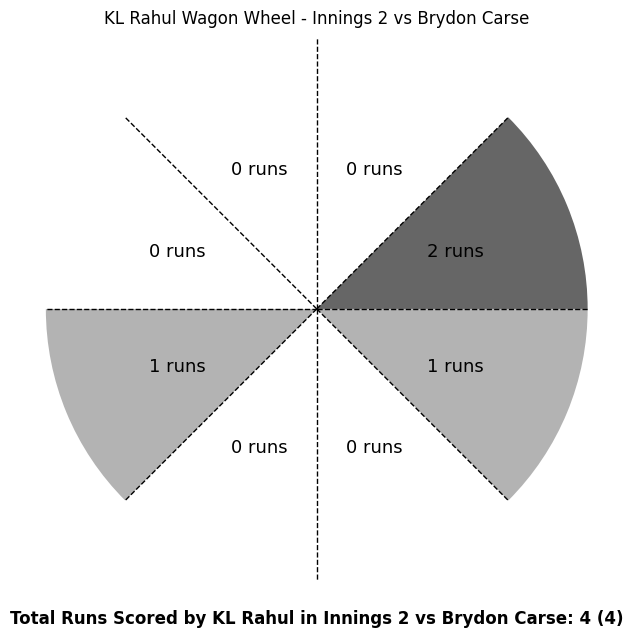

In [ ]:
test_match_wagon_colored(df, 'KL Rahul', 2,'Brydon Carse',[1])

In [ ]:
df.columns

Index(['inningNumber', 'oversUnique', 'oversActual', 'overNumber', 'teamRuns',
       'batsmanRuns', 'isFour', 'isSix', 'isWicket', 'dismissalType', 'byes',
       'legbyes', 'wides', 'noballs', 'penalties', 'wagonX', 'wagonY',
       'wagonZone', 'pitchLine', 'pitchLength', 'shotType', 'shotControl',
       'totalInningRuns', 'totalInningWickets', 'title', 'batsmanName',
       'bowlerName'],
      dtype='object')

In [ ]:
df['dismissalType'].max()

2.0

### shot type summary

In [ ]:
def shot_type_summary(df, player_name):
    # Filter for that batsman and legal deliveries (not wides)
    player_df = df[(df['batsmanName'] == player_name) & (df['wides'] == 0)]

    # Group by shot type
    summary = player_df.groupby('shotType').agg(
        BF=('shotType', 'count'),  # balls faced per shot
        Runs=('batsmanRuns', 'sum')  # total runs scored per shot
    ).reset_index()

    # Calculate Strike Rate (SR)
    summary['SR'] = (summary['Runs'] / summary['BF']) * 100
    summary['SR'] = summary['SR'].round(2)

    # Sort by Balls Faced or Runs (optional)
    summary = summary.sort_values(by='BF', ascending=False).reset_index(drop=True)

    # Grand total row
    total_row = pd.DataFrame({
        'shotType': ['Grand Total'],
        'BF': [summary['BF'].sum()],
        'Runs': [summary['Runs'].sum()],
        'SR': [round(summary['Runs'].sum() / summary['BF'].sum() * 100, 2)]
    })

    # Append total row
    summary = pd.concat([summary, total_row], ignore_index=True)

    return summary

In [ ]:
shot_type_summary(df, 'Joe Root')

,shotType,BF,Runs,SR
0,DEFENDED,69,1,1.45
1,FLICK,39,33,84.62
2,COVER_DRIVE,22,17,77.27
3,LEFT_ALONE,18,0,0.00
4,ON_DRIVE,13,12,92.31
5,PUSH,11,8,72.73
6,STEERED,9,11,122.22
7,CUT_SHOT,5,2,40.00
8,SQUARE_DRIVE,5,9,180.00
9,PULL,3,1,33.33


In [ ]:
shot_type_summary(df, 'KL Rahul')

,shotType,BF,Runs,SR
0,DEFENDED,51,0,0.00
1,FLICK,21,17,80.95
2,LEFT_ALONE,15,0,0.00
3,COVER_DRIVE,7,10,142.86
4,ON_DRIVE,6,5,83.33
5,STEERED,4,7,175.00
6,PUSH,3,3,100.00
7,CUT_SHOT,1,4,400.00
8,DAB,1,0,0.00
9,HOOK,1,1,100.00


In [ ]:
df.columns

Index(['inningNumber', 'oversUnique', 'oversActual', 'overNumber', 'teamRuns',
       'batsmanRuns', 'isFour', 'isSix', 'isWicket', 'dismissalType', 'byes',
       'legbyes', 'wides', 'noballs', 'penalties', 'wagonX', 'wagonY',
       'wagonZone', 'pitchLine', 'pitchLength', 'shotType', 'shotControl',
       'totalInningRuns', 'totalInningWickets', 'title', 'batsmanName',
       'bowlerName'],
      dtype='object')

In [ ]:
df['bowlerName'].unique()

array(['Mohammed Siraj', 'Jasprit Bumrah', 'Akash Deep',
       'Nitish Kumar Reddy', 'Ravindra Jadeja', 'Washington Sundar',
       'Shoaib Bashir', 'Brydon Carse', 'Chris Woakes', 'Jofra Archer',
       'Ben Stokes'], dtype=object)

In [ ]:
def shot_type_wagon(df, player_name, inns,bowler_name=None):
    # Filter by match, player, and innings
    local_df = df[
        (df['batsmanName'] == player_name) &
        (df['inningNumber'] == inns)  
    ].copy()

    # Apply bowler filter if provided
    if bowler_name:
        local_df = local_df[local_df['bowlerName'] == bowler_name]

    balls_faced_df = local_df[
        (local_df['batsmanName'] == player_name) &
        (local_df['wides'] == 0)
    ][['batsmanName', 'wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()
    # Set score = 0 for extras without modifying original df
    # extras = ['wide', 'bye', 'leg bye']
    # local_df.loc[local_df['outcome'].str.lower().isin(extras), 'teamRuns'] = 0

    # playing_team = local_df['team_bat'].iloc[0] if not local_df.empty else "Unknown"
    # opponent_team = local_df['team_bowl'].iloc[0] if not local_df.empty else "Unknown"
    # Filter valid shot points
    player_data = local_df[
        ~((local_df['wagonX'] == 0) & (local_df['wagonY'] == 0))
    ][['wagonX', 'wagonY', 'teamRuns', 'batsmanRuns', 'shotType']].dropna()

    # if player_data.empty:
    #     print(f"No data found for {player_name} in this match,and in innings {inns}")
    #     return
    
    if player_data.empty:
        if bowler_name:
            print(f"No data found for {player_name} vs {bowler_name} in innings {inns}")
        else:
            print(f"No data found for {player_name} in innings {inns}")
        return

    # Color map (shotType)
    unique_shots = player_data['shotType'].unique()
    color_palette = plt.cm.get_cmap('tab20', len(unique_shots))  # up to 20 distinct colors
    shot_colors = {shot: color_palette(i) for i, shot in enumerate(unique_shots)}

    # player_data['color'] = player_data['score'].map(score_colors).fillna('black')
    player_data['color'] = player_data['shotType'].map(shot_colors).fillna('black')

    # Plot setup
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_facecolor("white")
    center_x, center_y = 180, 164

    # ax.scatter(player_data['wagonX'], player_data['wagonY'],
    #            c=player_data['color'], s=40, edgecolor='black', linewidth=0.6)

    # Draw lines
    for _, row in player_data.iterrows():
        ax.plot([center_x, row['wagonX']], [center_y, row['wagonY']],
                color=row['color'], linewidth=1.0, alpha=0.8)

    # Boundary
    boundary = plt.Circle((center_x, center_y), 180, color='black',
                          fill=False, linestyle='--', linewidth=1.2)
    # fill the boundary with a light color
    # boundary.set_facecolor("#00ADC8")
    ax.add_artist(boundary)

    # Pitch
    # pitch_length = 20.12
    # pitch_width = 3
    # pitch = plt.Rectangle((center_x - pitch_width / 2, center_y),
    #                       pitch_width, pitch_length,
    #                       edgecolor='black', facecolor='none', linewidth=1.5)
    # ax.add_artist(pitch)

    # Quadrants
    for angle in range(0, 360, 45):
        rad = np.deg2rad(angle)
        x_end = center_x + 180 * np.cos(rad)
        y_end = center_y + 180 * np.sin(rad)
        ax.plot([center_x, x_end], [center_y, y_end], color='black', linestyle='--', linewidth=1)

    def get_quadrant(x, y):
        angle = np.arctan2(y - center_y, x - center_x)
        degree = (np.degrees(angle) + 360) % 360
        return int(degree // 45)

    player_data['quadrant'] = player_data.apply(
        lambda row: get_quadrant(row['wagonX'], row['wagonY']), axis=1
    )

    # Quadrant scores
    quadrant_totals = [0] * 8
    total_score = 0
    for q in range(8):
        q_score = player_data[player_data['quadrant'] == q]['teamRuns'].sum()
        q_score = player_data[player_data['quadrant'] == q]['batsmanRuns'].sum()
        quadrant_totals[q] = q_score
        total_score += q_score

    for i in range(8):
        mid_angle = np.deg2rad(i * 45 + 22.5)
        label_x = center_x + 100 * np.cos(mid_angle)
        label_y = center_y + 100 * np.sin(mid_angle)
        # ax.text(label_x, label_y, f"{quadrant_totals[i]} runs", fontsize=11, ha='center', va='center')

    # Layout
    ax.set_xlim(-20, 380)
    ax.set_ylim(-20, 390)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal', adjustable='box')

    bowler_text = f" vs {bowler_name}" if bowler_name else ""
    ax.set_title(f"{player_name} Spike Graph Wheel Innings: {inns} - Shot Type", fontsize=12) 

    #  Add total score annotation to bottom center
    
        # ---- Shot type stats: Balls Faced and Runs ----
    # Only legal balls (no wides) for balls faced
    shot_stats_df = local_df[local_df['wides'] == 0].groupby('shotType').agg(
        BF=('shotType', 'count'),
        Runs=('batsmanRuns', 'sum')
    ).reset_index()

    # Format string like "FLICK (12, 9)" and join with |
    shot_stats_text = " | ".join([
        f"{row['shotType']} ( {row['Runs']},{row['BF']})"
        for _, row in shot_stats_df.iterrows()
    ])

    # Display just above the bottom text
    ax.text(180, 360, shot_stats_text,
            fontsize=9, ha='center', va='center', color='black', wrap=True)


    ax.text(180, 380, f"Total Runs Scored by {player_name}  in Inns: {inns} vs {bowler_name}: {total_score} ({balls_faced_df.shape[0]})",
        fontsize=12, ha='center', va='center', fontweight='bold', color='black')

    ax.invert_yaxis()
    ax.set_axis_off()

    # Legend for shot types
    legend_elements = [
        mpatches.Patch(color=shot_colors[shot], label=shot) for shot in shot_colors
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=8)

    plt.subplots_adjust(left=0.05, right=0.95, top=0.93, bottom=0.07)
    plt.show()

C:\Users\INSPIRE COMP\AppData\Local\Temp\ipykernel_1176\536194654.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_palette = plt.cm.get_cmap('tab20', len(unique_shots))  # up to 20 distinct colors


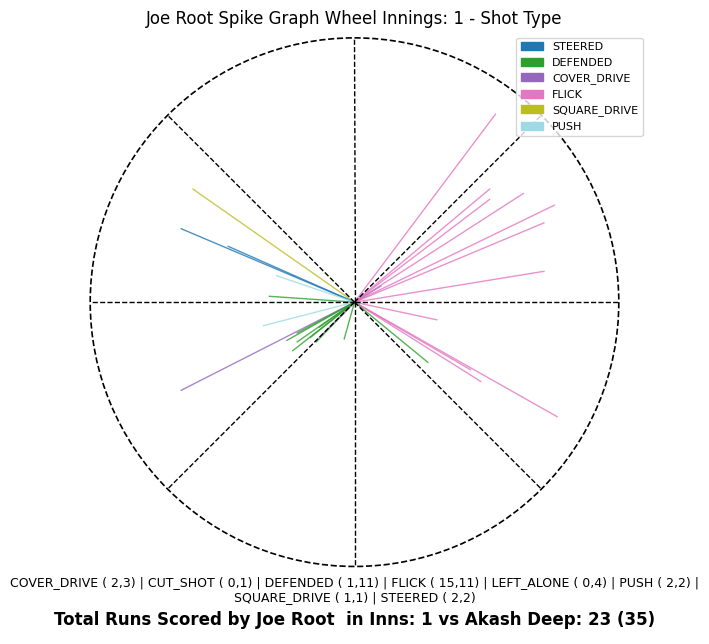

In [ ]:
shot_type_wagon(df, 'Joe Root', 1, 'Akash Deep')

*shot type with bowlername*

In [ ]:
# method 3:
def shot_type_wagon(df, player_name, inns,bowler_name=None):
    # Filter by match, player, and innings
    local_df = df[
        (df['batsmanName'] == player_name) &
        (df['inningNumber'] == inns)  
    ].copy()

    # Apply bowler filter if provided
    if bowler_name:
        local_df = local_df[local_df['bowlerName'] == bowler_name]

    balls_faced_df = local_df[
        (local_df['batsmanName'] == player_name) &
        (local_df['wides'] == 0)
    ][['batsmanName', 'wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()
    # Set score = 0 for extras without modifying original df
    # extras = ['wide', 'bye', 'leg bye']
    # local_df.loc[local_df['outcome'].str.lower().isin(extras), 'teamRuns'] = 0

    # playing_team = local_df['team_bat'].iloc[0] if not local_df.empty else "Unknown"
    # opponent_team = local_df['team_bowl'].iloc[0] if not local_df.empty else "Unknown"
    # Filter valid shot points
    player_data = local_df[
        ~((local_df['wagonX'] == 0) & (local_df['wagonY'] == 0))
    ][['wagonX', 'wagonY', 'teamRuns', 'batsmanRuns', 'shotType']].dropna()

    # if player_data.empty:
    #     print(f"No data found for {player_name} in this match,and in innings {inns}")
    #     return
    
    if player_data.empty:
        if bowler_name:
            print(f"No data found for {player_name} vs {bowler_name} in innings {inns}")
        else:
            print(f"No data found for {player_name} in innings {inns}")
        return

    # Color map (shotType)
    unique_shots = player_data['shotType'].unique()
    color_palette = plt.cm.get_cmap('tab20', len(unique_shots))  # up to 20 distinct colors
    shot_colors = {shot: color_palette(i) for i, shot in enumerate(unique_shots)}

    # player_data['color'] = player_data['score'].map(score_colors).fillna('black')
    player_data['color'] = player_data['shotType'].map(shot_colors).fillna('black')

    # Plot setup
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_facecolor("white")
    center_x, center_y = 180, 164

    # ax.scatter(player_data['wagonX'], player_data['wagonY'],
    #            c=player_data['color'], s=40, edgecolor='black', linewidth=0.6)

    # Draw lines
    for _, row in player_data.iterrows():
        ax.plot([center_x, row['wagonX']], [center_y, row['wagonY']],
                color=row['color'], linewidth=1.0, alpha=0.8)

    # Boundary
    boundary = plt.Circle((center_x, center_y), 180, color='black',
                          fill=False, linestyle='--', linewidth=1.2)
    # fill the boundary with a light color
    # boundary.set_facecolor("#00ADC8")
    ax.add_artist(boundary)

    # Pitch
    # pitch_length = 20.12
    # pitch_width = 3
    # pitch = plt.Rectangle((center_x - pitch_width / 2, center_y),
    #                       pitch_width, pitch_length,
    #                       edgecolor='black', facecolor='none', linewidth=1.5)
    # ax.add_artist(pitch)

    # Quadrants
    for angle in range(0, 360, 45):
        rad = np.deg2rad(angle)
        x_end = center_x + 180 * np.cos(rad)
        y_end = center_y + 180 * np.sin(rad)
        ax.plot([center_x, x_end], [center_y, y_end], color='black', linestyle='--', linewidth=1)

    def get_quadrant(x, y):
        angle = np.arctan2(y - center_y, x - center_x)
        degree = (np.degrees(angle) + 360) % 360
        return int(degree // 45)

    player_data['quadrant'] = player_data.apply(
        lambda row: get_quadrant(row['wagonX'], row['wagonY']), axis=1
    )

    # Quadrant scores
    quadrant_totals = [0] * 8
    total_score = 0
    for q in range(8):
        q_score = player_data[player_data['quadrant'] == q]['teamRuns'].sum()
        q_score = player_data[player_data['quadrant'] == q]['batsmanRuns'].sum()
        quadrant_totals[q] = q_score
        total_score += q_score

    for i in range(8):
        mid_angle = np.deg2rad(i * 45 + 22.5)
        label_x = center_x + 100 * np.cos(mid_angle)
        label_y = center_y + 100 * np.sin(mid_angle)
        # ax.text(label_x, label_y, f"{quadrant_totals[i]} runs", fontsize=11, ha='center', va='center')

    # Layout
    ax.set_xlim(-20, 380)
    ax.set_ylim(-20, 390)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal', adjustable='box')

    bowler_text = f" vs {bowler_name}" if bowler_name else ""
    ax.set_title(f"{player_name} Spike Graph Wheel Innings: {inns} - Shot Type", fontsize=12) 

    #  Add total score annotation to bottom center
    
        # ---- Shot type stats: Balls Faced and Runs ----
    # Only legal balls (no wides) for balls faced
    shot_stats_df = local_df[local_df['wides'] == 0].groupby('shotType').agg(
        BF=('shotType', 'count'),
        Runs=('batsmanRuns', 'sum')
    ).reset_index()

    # Format string like "FLICK (12, 9)" and join with |
    shot_stats_text = " | ".join([
        f"{row['shotType']} ( {row['Runs']},{row['BF']})"
        for _, row in shot_stats_df.iterrows()
    ])

    # Display just above the bottom text
    ax.text(180, 360, shot_stats_text,
            fontsize=9, ha='center', va='center', color='black', wrap=True)


    ax.text(180, 380, f"Total Runs Scored by {player_name}  in Inns: {inns} vs {bowler_name}: {total_score} ({balls_faced_df.shape[0]})",
        fontsize=12, ha='center', va='center', fontweight='bold', color='black')

    ax.invert_yaxis()
    ax.set_axis_off()

    # Legend for shot types
    legend_elements = [
        mpatches.Patch(color=shot_colors[shot], label=shot) for shot in shot_colors
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=8)

    plt.subplots_adjust(left=0.05, right=0.95, top=0.93, bottom=0.07)
    # plt.show()
    return fig


In [ ]:
df['bowlerName'].unique()

array(['Mohammed Siraj', 'Jasprit Bumrah', 'Akash Deep',
       'Nitish Kumar Reddy', 'Ravindra Jadeja', 'Washington Sundar',
       'Shoaib Bashir', 'Brydon Carse', 'Chris Woakes', 'Jofra Archer',
       'Ben Stokes'], dtype=object)

In [ ]:
ind_b = {'Mohammed Siraj', 'Jasprit Bumrah', 'Akash Deep',
       'Nitish Kumar Reddy', 'Ravindra Jadeja', 'Washington Sundar'}

In [ ]:
eng_b = {'Shoaib Bashir', 'Brydon Carse', 'Chris Woakes', 'Jofra Archer',
       'Ben Stokes'}

C:\Users\INSPIRE COMP\AppData\Local\Temp\ipykernel_1176\534868308.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_palette = plt.cm.get_cmap('tab20', len(unique_shots))  # up to 20 distinct colors


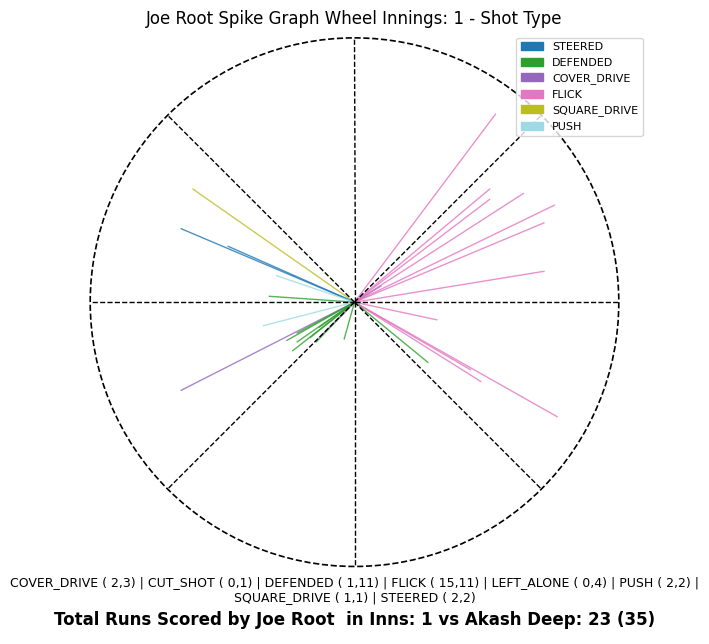

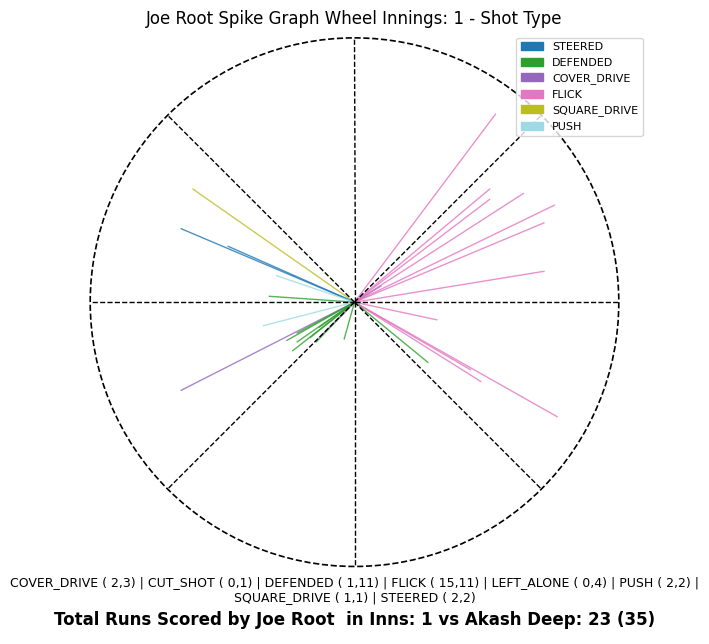

In [ ]:
shot_type_wagon(df, 'Joe Root', 1, 'Akash Deep')

C:\Users\INSPIRE COMP\AppData\Local\Temp\ipykernel_1176\534868308.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_palette = plt.cm.get_cmap('tab20', len(unique_shots))  # up to 20 distinct colors


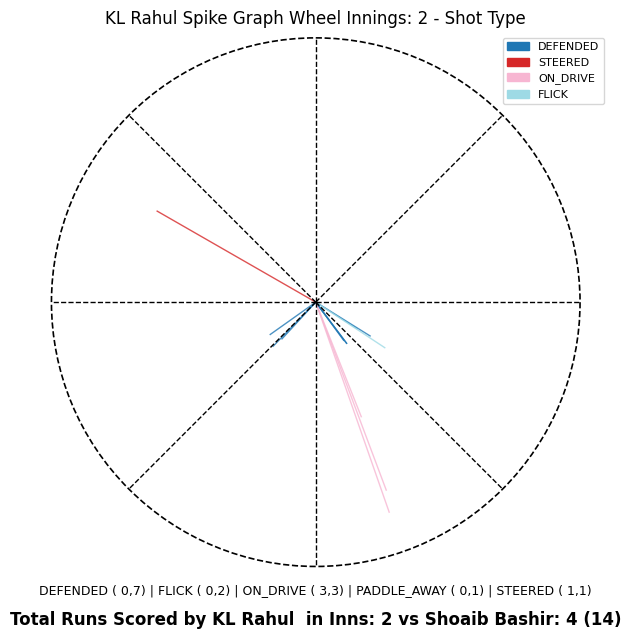

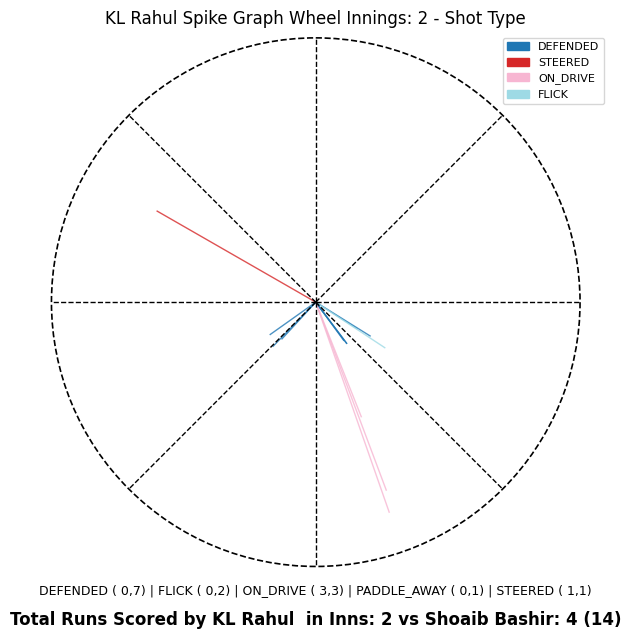

In [ ]:
shot_type_wagon(df, 'KL Rahul', 2, eng_b.pop())

In [ ]:
df.columns

Index(['inningNumber', 'oversUnique', 'oversActual', 'overNumber', 'teamRuns',
       'batsmanRuns', 'isFour', 'isSix', 'isWicket', 'dismissalType', 'byes',
       'legbyes', 'wides', 'noballs', 'penalties', 'wagonX', 'wagonY',
       'wagonZone', 'pitchLine', 'pitchLength', 'shotType', 'shotControl',
       'totalInningRuns', 'totalInningWickets', 'title', 'batsmanName',
       'bowlerName'],
      dtype='object')

In [ ]:
df['pitchLength'].unique()

array(['YORKER', 'SHORT_OF_A_GOOD_LENGTH', 'SHORT', 'GOOD_LENGTH', 'FULL',
       'FULL_TOSS'], dtype=object)

## pitch type wagon and stats

In [ ]:
def pitch_type_wagon(df, player_name, inns,bowler_name=None):
    # Filter by match, player, and innings
    local_df = df[
        (df['batsmanName'] == player_name) &
        (df['inningNumber'] == inns)  
    ].copy()

    # Apply bowler filter if provided
    if bowler_name:
        local_df = local_df[local_df['bowlerName'] == bowler_name]

    balls_faced_df = local_df[
        (local_df['batsmanName'] == player_name) &
        (local_df['wides'] == 0)
    ][['batsmanName', 'wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()
    # Set score = 0 for extras without modifying original df
    # extras = ['wide', 'bye', 'leg bye']
    # local_df.loc[local_df['outcome'].str.lower().isin(extras), 'teamRuns'] = 0

    # playing_team = local_df['team_bat'].iloc[0] if not local_df.empty else "Unknown"
    # opponent_team = local_df['team_bowl'].iloc[0] if not local_df.empty else "Unknown"
    # Filter valid shot points
    player_data = local_df[
        ~((local_df['wagonX'] == 0) & (local_df['wagonY'] == 0))
    ][['wagonX', 'wagonY', 'teamRuns', 'batsmanRuns', 'pitchLength']].dropna()

    # if player_data.empty:
    #     print(f"No data found for {player_name} in this match,and in innings {inns}")
    #     return
    
    if player_data.empty:
        if bowler_name:
            print(f"No data found for {player_name} vs {bowler_name} in innings {inns}")
        else:
            print(f"No data found for {player_name} in innings {inns}")
        return

    # Color map (shotType)
    pitch_length = player_data['pitchLength'].unique()
    color_palette = plt.cm.get_cmap('tab20', len(pitch_length))  # up to 20 distinct colors
    shot_colors = {shot: color_palette(i) for i, shot in enumerate(pitch_length)}

    # player_data['color'] = player_data['score'].map(score_colors).fillna('black')
    player_data['color'] = player_data['pitchLength'].map(shot_colors).fillna('black')

    # Plot setup
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_facecolor("white")
    center_x, center_y = 180, 164

    # ax.scatter(player_data['wagonX'], player_data['wagonY'],
    #            c=player_data['color'], s=40, edgecolor='black', linewidth=0.6)

    # Draw lines
    for _, row in player_data.iterrows():
        ax.plot([center_x, row['wagonX']], [center_y, row['wagonY']],
                color=row['color'], linewidth=1.0, alpha=0.8)

    # Boundary
    boundary = plt.Circle((center_x, center_y), 180, color='black',
                          fill=False, linestyle='--', linewidth=1.2)
    # fill the boundary with a light color
    # boundary.set_facecolor("#00ADC8")
    ax.add_artist(boundary)

    # Pitch
    # pitch_length = 20.12
    # pitch_width = 3
    # pitch = plt.Rectangle((center_x - pitch_width / 2, center_y),
    #                       pitch_width, pitch_length,
    #                       edgecolor='black', facecolor='none', linewidth=1.5)
    # ax.add_artist(pitch)

    # Quadrants
    for angle in range(0, 360, 45):
        rad = np.deg2rad(angle)
        x_end = center_x + 180 * np.cos(rad)
        y_end = center_y + 180 * np.sin(rad)
        ax.plot([center_x, x_end], [center_y, y_end], color='black', linestyle='--', linewidth=1)

    def get_quadrant(x, y):
        angle = np.arctan2(y - center_y, x - center_x)
        degree = (np.degrees(angle) + 360) % 360
        return int(degree // 45)

    player_data['quadrant'] = player_data.apply(
        lambda row: get_quadrant(row['wagonX'], row['wagonY']), axis=1
    )

    # Quadrant scores
    quadrant_totals = [0] * 8
    total_score = 0
    for q in range(8):
        q_score = player_data[player_data['quadrant'] == q]['teamRuns'].sum()
        q_score = player_data[player_data['quadrant'] == q]['batsmanRuns'].sum()
        quadrant_totals[q] = q_score
        total_score += q_score

    for i in range(8):
        mid_angle = np.deg2rad(i * 45 + 22.5)
        label_x = center_x + 100 * np.cos(mid_angle)
        label_y = center_y + 100 * np.sin(mid_angle)
        # ax.text(label_x, label_y, f"{quadrant_totals[i]} runs", fontsize=11, ha='center', va='center')

    # Layout
    ax.set_xlim(-20, 380)
    ax.set_ylim(-20, 390)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal', adjustable='box')

    bowler_text = f" vs {bowler_name}" if bowler_name else ""
    ax.set_title(f"{player_name} Spike Graph Wheel Innings: {inns} - Pitch Length", fontsize=12) 

    #  Add total score annotation to bottom center

        # ---- Pitch Length stats: Balls Faced and Runs ----
    pitch_stats_df = local_df[local_df['wides'] == 0].groupby('pitchLength').agg(
        BF=('pitchLength', 'count'),
        Runs=('batsmanRuns', 'sum')
    ).reset_index()

    # Format like "SHORT (12, 14) | FULL (9, 22)"
    pitch_stats_text = " | ".join([
        f"{row['pitchLength']} ({row['Runs']},{row['BF']})"
        for _, row in pitch_stats_df.iterrows()
    ])

    # Display just above the bottom score text
    ax.text(180, 360, pitch_stats_text,
            fontsize=9, ha='center', va='center', color='black', wrap=True)


    ax.text(180, 380, f"Total Runs Scored by {player_name}  in Inns: {inns} vs {bowler_name}: {total_score} ({balls_faced_df.shape[0]})",
        fontsize=12, ha='center', va='center', fontweight='bold', color='black')

    ax.invert_yaxis()
    ax.set_axis_off()

    # Legend for shot types
    legend_elements = [
        mpatches.Patch(color=shot_colors[shot], label=shot) for shot in shot_colors
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=8)

    plt.subplots_adjust(left=0.05, right=0.95, top=0.93, bottom=0.07)
    plt.show()

C:\Users\INSPIRE COMP\AppData\Local\Temp\ipykernel_1176\2329495649.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_palette = plt.cm.get_cmap('tab20', len(pitch_length))  # up to 20 distinct colors


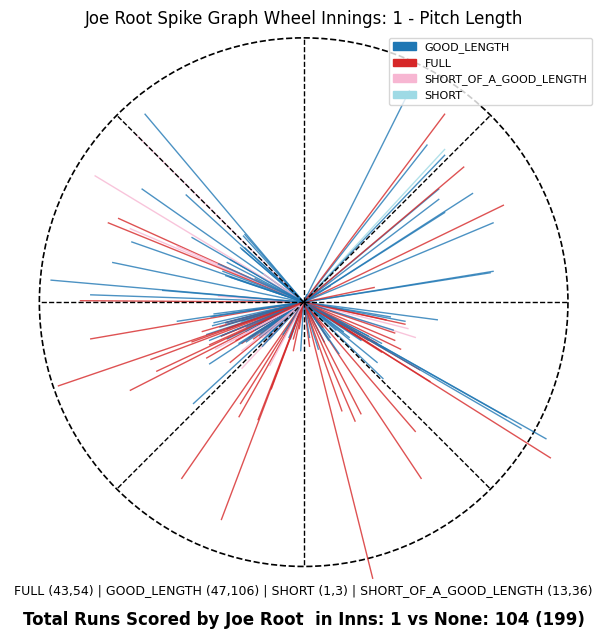

In [ ]:
pitch_type_wagon(df, 'Joe Root', 1, None)

In [ ]:
df.columns

Index(['inningNumber', 'oversUnique', 'oversActual', 'overNumber', 'teamRuns',
       'batsmanRuns', 'isFour', 'isSix', 'isWicket', 'dismissalType', 'byes',
       'legbyes', 'wides', 'noballs', 'penalties', 'wagonX', 'wagonY',
       'wagonZone', 'pitchLine', 'pitchLength', 'shotType', 'shotControl',
       'totalInningRuns', 'totalInningWickets', 'title', 'batsmanName',
       'bowlerName'],
      dtype='object')

*pitch type with bowlername*

C:\Users\INSPIRE COMP\AppData\Local\Temp\ipykernel_1176\560322976.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_palette = plt.cm.get_cmap('tab20', len(pitch_length))  # up to 20 distinct colors


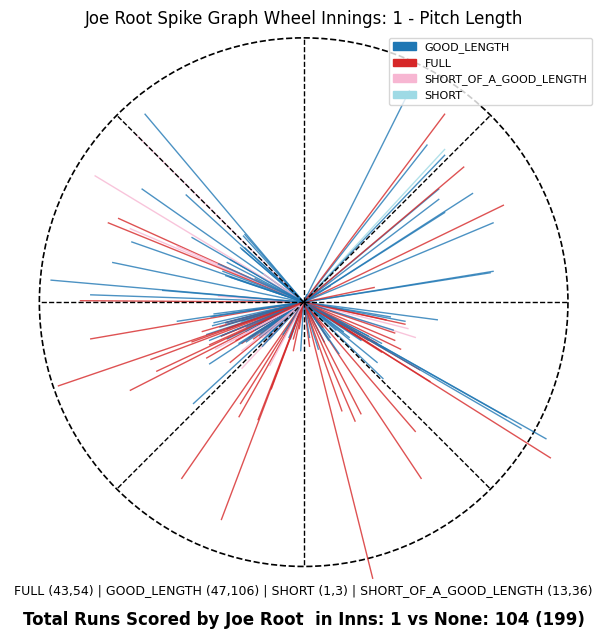

In [ ]:
# method 4:
def pitch_type_wagon(df, player_name, inns,bowler_name=None):
    # Filter by match, player, and innings
    local_df = df[
        (df['batsmanName'] == player_name) &
        (df['inningNumber'] == inns)  
    ].copy()

    # Apply bowler filter if provided
    if bowler_name:
        local_df = local_df[local_df['bowlerName'] == bowler_name]

    balls_faced_df = local_df[
        (local_df['batsmanName'] == player_name) &
        (local_df['wides'] == 0)
    ][['batsmanName', 'wagonX', 'wagonY', 'teamRuns', 'batsmanRuns']].dropna()
    # Set score = 0 for extras without modifying original df
    # extras = ['wide', 'bye', 'leg bye']
    # local_df.loc[local_df['outcome'].str.lower().isin(extras), 'teamRuns'] = 0

    # playing_team = local_df['team_bat'].iloc[0] if not local_df.empty else "Unknown"
    # opponent_team = local_df['team_bowl'].iloc[0] if not local_df.empty else "Unknown"
    # Filter valid shot points
    player_data = local_df[
        ~((local_df['wagonX'] == 0) & (local_df['wagonY'] == 0))
    ][['wagonX', 'wagonY', 'teamRuns', 'batsmanRuns', 'pitchLength']].dropna()

    # if player_data.empty:
    #     print(f"No data found for {player_name} in this match,and in innings {inns}")
    #     return
    
    if player_data.empty:
        if bowler_name:
            print(f"No data found for {player_name} vs {bowler_name} in innings {inns}")
        else:
            print(f"No data found for {player_name} in innings {inns}")
        return

    # Color map (shotType)
    pitch_length = player_data['pitchLength'].unique()
    color_palette = plt.cm.get_cmap('tab20', len(pitch_length))  # up to 20 distinct colors
    shot_colors = {shot: color_palette(i) for i, shot in enumerate(pitch_length)}

    # player_data['color'] = player_data['score'].map(score_colors).fillna('black')
    player_data['color'] = player_data['pitchLength'].map(shot_colors).fillna('black')

    # Plot setup
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_facecolor("white")
    center_x, center_y = 180, 164

    # ax.scatter(player_data['wagonX'], player_data['wagonY'],
    #            c=player_data['color'], s=40, edgecolor='black', linewidth=0.6)

    # Draw lines
    for _, row in player_data.iterrows():
        ax.plot([center_x, row['wagonX']], [center_y, row['wagonY']],
                color=row['color'], linewidth=1.0, alpha=0.8)

    # Boundary
    boundary = plt.Circle((center_x, center_y), 180, color='black',
                          fill=False, linestyle='--', linewidth=1.2)
    # fill the boundary with a light color
    # boundary.set_facecolor("#00ADC8")
    ax.add_artist(boundary)

    # Pitch
    # pitch_length = 20.12
    # pitch_width = 3
    # pitch = plt.Rectangle((center_x - pitch_width / 2, center_y),
    #                       pitch_width, pitch_length,
    #                       edgecolor='black', facecolor='none', linewidth=1.5)
    # ax.add_artist(pitch)

    # Quadrants
    for angle in range(0, 360, 45):
        rad = np.deg2rad(angle)
        x_end = center_x + 180 * np.cos(rad)
        y_end = center_y + 180 * np.sin(rad)
        ax.plot([center_x, x_end], [center_y, y_end], color='black', linestyle='--', linewidth=1)

    def get_quadrant(x, y):
        angle = np.arctan2(y - center_y, x - center_x)
        degree = (np.degrees(angle) + 360) % 360
        return int(degree // 45)

    player_data['quadrant'] = player_data.apply(
        lambda row: get_quadrant(row['wagonX'], row['wagonY']), axis=1
    )

    # Quadrant scores
    quadrant_totals = [0] * 8
    total_score = 0
    for q in range(8):
        q_score = player_data[player_data['quadrant'] == q]['teamRuns'].sum()
        q_score = player_data[player_data['quadrant'] == q]['batsmanRuns'].sum()
        quadrant_totals[q] = q_score
        total_score += q_score

    for i in range(8):
        mid_angle = np.deg2rad(i * 45 + 22.5)
        label_x = center_x + 100 * np.cos(mid_angle)
        label_y = center_y + 100 * np.sin(mid_angle)
        # ax.text(label_x, label_y, f"{quadrant_totals[i]} runs", fontsize=11, ha='center', va='center')

    # Layout
    ax.set_xlim(-20, 380)
    ax.set_ylim(-20, 390)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal', adjustable='box')

    bowler_text = f" vs {bowler_name}" if bowler_name else ""
    ax.set_title(f"{player_name} Spike Graph Wheel Innings: {inns} - Pitch Length", fontsize=12) 

    #  Add total score annotation to bottom center

        # ---- Pitch Length stats: Balls Faced and Runs ----
    pitch_stats_df = local_df[local_df['wides'] == 0].groupby('pitchLength').agg(
        BF=('pitchLength', 'count'),
        Runs=('batsmanRuns', 'sum')
    ).reset_index()

    # Format like "SHORT (12, 14) | FULL (9, 22)"
    pitch_stats_text = " | ".join([
        f"{row['pitchLength']} ({row['Runs']},{row['BF']})"
        for _, row in pitch_stats_df.iterrows()
    ])

    # Display just above the bottom score text
    ax.text(180, 360, pitch_stats_text,
            fontsize=9, ha='center', va='center', color='black', wrap=True)


    ax.text(180, 380, f"Total Runs Scored by {player_name}  in Inns: {inns} vs {bowler_name}: {total_score} ({balls_faced_df.shape[0]})",
        fontsize=12, ha='center', va='center', fontweight='bold', color='black')

    ax.invert_yaxis()
    ax.set_axis_off()

    # Legend for shot types
    legend_elements = [
        mpatches.Patch(color=shot_colors[shot], label=shot) for shot in shot_colors
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=8)

    plt.subplots_adjust(left=0.05, right=0.95, top=0.93, bottom=0.07)
    plt.show()

# example
pitch_type_wagon(df, 'Joe Root', 1, None)

---
---

# Bowlers Stats 

for now we have to work on bowlers stats:
means first we have to calculate the balls bowled, bowler_runs which is calculates as(bowl_runs = teamRuns - byes - legbyes), economy, strike rate of bowler, wickets taken, total overs bowled which is calculated the dividing the ballsbowled with 6.

In [ ]:
# now we have to work on bowlers stats:

In [ ]:
def calculate_bowler_stats(df, bowler_name=None, innings_number=None, batter_name=None):
    # Apply filters
    if innings_number is not None:
        df = df[df['inningNumber'] == innings_number]
    if bowler_name is not None:
        df = df[df['bowlerName'] == bowler_name]
    if batter_name is not None:
        df = df[df['batsmanName'] == batter_name]

    # Add calculated column: bowlerRuns = teamRuns - byes - legbyes
    df['bowlerRuns'] = df['teamRuns'] - df['byes'] - df['legbyes']

    # Filter legal deliveries (no wides, no noballs)
    legal_df = df[(df['wides'] == 0) & (df['noballs'] == 0)]

    # Group by bowler
    grouped = legal_df.groupby('bowlerName')

    # Stats computation
    stats = pd.DataFrame()
    stats['Balls Bowled'] = grouped.size()
    stats['Wickets Taken'] = grouped['isWicket'].sum()
    stats['Runs Conceded'] = df.groupby('bowlerName')['bowlerRuns'].sum()
    stats['Overs'] = stats['Balls Bowled'] // 6 + (stats['Balls Bowled'] % 6) / 10
    stats['Economy'] = (stats['Runs Conceded'] / stats['Balls Bowled']) * 6

    # Strike rate
    stats['Strike Rate'] = stats.apply(
        lambda row: round(row['Balls Bowled'] / row['Wickets Taken'], 2) if row['Wickets Taken'] > 0 else None,
        axis=1
    )

    # Round values
    stats = stats.round({
        'Overs': 1,
        'Economy': 2
    })

    # Reorder columns
    stats = stats[['Runs Conceded', 'Balls Bowled', 'Overs', 'Wickets Taken', 'Economy', 'Strike Rate']]
    stats = stats.reset_index()

    # Create filter summary
    heading = f"Bowler Stats"
    if bowler_name:
        heading += f" for {bowler_name}"
    if batter_name:
        heading += f" vs {batter_name}"
    if innings_number:
        heading += f" in Innings {innings_number}"

    return heading, stats

In [ ]:
heading, bowler_stats = calculate_bowler_stats(df, 'Jasprit Bumrah',1)
print(heading)
bowler_stats

Bowler Stats for Jasprit Bumrah in Innings 1


,bowlerName,Runs Conceded,Balls Bowled,Overs,Wickets Taken,Economy,Strike Rate
0,Jasprit Bumrah,74,162,27.0,5,2.74,32.4


In [ ]:
heading, bowler_stats = calculate_bowler_stats(df, 'Jasprit Bumrah',1, 'Joe Root')
print(heading)
bowler_stats

Bowler Stats for Jasprit Bumrah vs Joe Root in Innings 1


,bowlerName,Runs Conceded,Balls Bowled,Overs,Wickets Taken,Economy,Strike Rate
0,Jasprit Bumrah,15,28,4.4,1,3.21,28.0


*bowler pitch stats analysis*

In [ ]:
def calculate_bowler_pitch_stats(df, bowler_name=None, innings_number=None, batter_name=None):
    # Apply filters
    if innings_number is not None:
        df = df[df['inningNumber'] == innings_number]
    if bowler_name is not None:
        df = df[df['bowlerName'] == bowler_name]
    if batter_name is not None:
        df = df[df['batsmanName'] == batter_name]

    # Calculate bowlerRuns
    df['bowlerRuns'] = df['teamRuns'] - df['byes'] - df['legbyes']

    # Filter legal deliveries only
    legal_df = df[(df['wides'] == 0) & (df['noballs'] == 0)]

    # Group by pitchLength
    grouped = legal_df.groupby('pitchLength')

    pitch_stats = pd.DataFrame()
    pitch_stats['BB'] = grouped.size()
    pitch_stats['Runs'] = grouped['bowlerRuns'].sum()
    pitch_stats['ECO'] = (pitch_stats['Runs'] / pitch_stats['BB']) * 6
    pitch_stats['ECO'] = pitch_stats['ECO'].round(2)

    pitch_stats = pitch_stats.reset_index()

    # Optional Grand Total row
    total_row = {
        'pitchLength': 'Grand Total',
        'BB': pitch_stats['BB'].sum(),
        'Runs': pitch_stats['Runs'].sum(),
        'ECO': round((pitch_stats['Runs'].sum() / pitch_stats['BB'].sum()) * 6, 2)
    }
    pitch_stats = pd.concat([pitch_stats, pd.DataFrame([total_row])], ignore_index=True)

    # Heading summary
    heading = f"Bowling Stats by Pitch Length"
    if bowler_name:
        heading += f" for {bowler_name}"
    if batter_name:
        heading += f" vs {batter_name}"
    if innings_number:
        heading += f" in Innings {innings_number}"

    return heading, pitch_stats


In [ ]:
heading, bowler_pitch_stats = calculate_bowler_pitch_stats(df, 'Jasprit Bumrah', 1, 'Joe Root')
print(heading)
bowler_pitch_stats

Bowling Stats by Pitch Length for Jasprit Bumrah vs Joe Root in Innings 1


,pitchLength,BB,Runs,ECO
0,FULL,6,5,5.00
1,GOOD_LENGTH,18,10,3.33
2,SHORT,1,0,0.00
3,SHORT_OF_A_GOOD_LENGTH,3,0,0.00
4,Grand Total,28,15,3.21


In [ ]:
calculate_bowler_pitch_stats(df, 'Jasprit Bumrah', 1, None)
# print(heading)
# bowler_pitch_stats

('Bowling Stats by Pitch Length for Jasprit Bumrah in Innings 1',
               pitchLength   BB  Runs    ECO
 0                    FULL   28    25   5.36
 1               FULL_TOSS    2     0   0.00
 2             GOOD_LENGTH  106    33   1.87
 3                   SHORT    9     0   0.00
 4  SHORT_OF_A_GOOD_LENGTH   15    11   4.40
 5                  YORKER    2     5  15.00
 6             Grand Total  162    74   2.74)

In [ ]:
def calculate_bowler_pitch_stats(df, bowler_name=None, innings_number=None, batter_name=None):
    # Apply filters
    if innings_number is not None:
        df = df[df['inningNumber'] == innings_number]
    if bowler_name is not None:
        df = df[df['bowlerName'] == bowler_name]
    if batter_name is not None:
        df = df[df['batsmanName'] == batter_name]

    # Calculate bowlerRuns
    df['bowlerRuns'] = df['teamRuns'] - df['byes'] - df['legbyes']

    # Filter legal deliveries only
    legal_df = df[(df['wides'] == 0) & (df['noballs'] == 0)]

    # Group by pitchLength
    grouped = legal_df.groupby('pitchLength')

    pitch_stats = pd.DataFrame()
    pitch_stats['BB'] = grouped.size()
    pitch_stats['Runs'] = grouped['bowlerRuns'].sum()
    # pitch_stats['Singles'] = grouped[['batsmanRuns']==1]
    pitch_stats['ECO'] = (pitch_stats['Runs'] / pitch_stats['BB']) * 6
    pitch_stats['ECO'] = pitch_stats['ECO'].round(2)
    

    pitch_stats = pitch_stats.reset_index()

    # Optional Grand Total row
    total_row = {
        'pitchLength': 'Grand Total',
        'BB': pitch_stats['BB'].sum(),
        # 'Singles': pitch_stats['Singles'].sum(),
        'Runs': pitch_stats['Runs'].sum(),
        'ECO': round((pitch_stats['Runs'].sum() / pitch_stats['BB'].sum()) * 6, 2)
    }
    pitch_stats = pd.concat([pitch_stats, pd.DataFrame([total_row])], ignore_index=True)

    # Heading summary
    heading = f"Bowling Stats by Pitch Length"
    if bowler_name:
        heading += f" for {bowler_name}"
    if batter_name:
        heading += f" vs {batter_name}"
    if innings_number:
        heading += f" in Innings {innings_number}"

    # return a single dataframe
    return heading, pitch_stats

In [ ]:
calculate_bowler_pitch_stats(df, 'Jasprit Bumrah', 1, None)
print(heading)
bowler_pitch_stats

Bowling Stats by Pitch Length for Jasprit Bumrah vs Joe Root in Innings 1


,pitchLength,BB,Runs,ECO
0,FULL,6,5,5.00
1,GOOD_LENGTH,18,10,3.33
2,SHORT,1,0,0.00
3,SHORT_OF_A_GOOD_LENGTH,3,0,0.00
4,Grand Total,28,15,3.21
